# SAT & ACT Analysis

## Problem Statement

I looked over aggregate SAT and ACT scores and participation rates from each state in the United States for 2017 and 2018. I sought to identify trends in the data and combine my data analysis with outside research to identify likely factors influencing participation rates and scores in various states.

## Executive Summary

My approach was to import all of the data for the 2017 and 2018 SAT and ACT scores and participation rates, then thoroughly clean the data, and compare and analyze all of the stats pulled from the data, using various graphs and EDAs.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [3]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### Read In SAT & ACT  Data

In [1]:
!pwd

/Users/michaelknight/Desktop/GA_DSI_BEYOND/Personal_Github/Projects/Standardized Testing, Statistical Summaries and Inference/code


In [4]:
#Code:
#read sat_2017.csv into 'sat'
sat_17 = pd.read_csv('../data/sat_2017.csv')

In [6]:
#read act_2017.csv into 'act'
act_17 = pd.read_csv('../data/act_2017.csv')

#### Observe Data

In [5]:
#Code:
#return first 10 values of sat.csv
sat_17.head(n=10) 

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [6]:
#return first 10 values of act.csv
act_17.head(n=10) 

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


SAT data lists each state (str), each state's percentage of participation (str), each state's average score for reading and writing (int), score for math (int), and average total score(int).

The ACT data lists each state (str), each state's percentage of participation(str), each state's average score for English(float), score for Math(float), score for Reading(float), score for Science(float), and composite score (str) (note that composite score is given as string because composite for Wyoming was entered as 20.2x).  in addition to each state, the national average is also listed (as a state)

#### Incomplete data

This data does not look complete; SAT doesn't give national average (ACT does), and there are some errors in the SAT totals and elsewhere 

#### Errors in the data

For the SAT dataset, the total minimum values is a lot higher then the value of the minimum for math plus the minimum for reading/writing.  Looking over all of the data, the math score for Maryland is written as '52' instead of '524'.  the total score on multiple occasions is NOT equal to the readin/writing score plus the math score.

For the ACT dataset, composite score comes back as string instead of float:  this is because composite values has value of "20.2x" for Wyoming.

In [7]:
#for "math" score of Maryland (which has index of 51) in sat.csv, replace 52 with 524
sat_17.loc[20, 'Math'] = 524

#### data types
Display the data types of each feature. 

In [7]:
#display datatypes of sat
sat_17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [9]:
#display datatypes of act
act_17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

Composites in ACT is still an object even though I switched out 20.2x with 20.2.  It Should be a float.

Participation would be a float or an int, if removed the percentage symbol (%)

In [10]:
#here is a function that takes out the % symbol and converts into a decimal representation of percentage
def remove_percent(x):
    out = float(x.replace('%', ''))/100
    return out

In [11]:
#apply remove_percent function to Participation column in ACT
act_17['Participation'] = act_17['Participation'].apply(remove_percent)

In [12]:
#check above alterations
#act_17['Participation']

In [13]:
#apply remove_percent function to Participation column in SAT
sat_17['Participation'] = sat_17['Participation'].apply(remove_percent)

In [14]:
#check above alterations
#sat_17['Participation']

In [15]:
#code got help from Nathan Jacques and Josh Robin
#for composite value of wyoming (which has index of 51) in ACT.csv, replace 20.2x with 20.2
act_17.loc[51, 'Composite'] = 20.2

In [16]:
#have to reassign "composite" collumn to numeric datatype 
act_17['Composite'] = pd.to_numeric(act_17['Composite']) 

- Make sure datatypes are now what they should be.

In [17]:
#display datatypes of sat
sat_17.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [18]:
#display datatypes of act
act_17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### Rename Columns
Change the names of the columns to more expressive names in order to differentiate the SAT columns and the ACT columns. This data will be combined with 2018 data, so I differentiated it as 2017

In [19]:
#rename columns in SAT 2017

#change this awful long cumbersome name to something much shorter  
sat_17.rename(columns={'Evidence-Based Reading and Writing': 'Reading Writing'}, inplace=True)

#change column names to lowercase
sat_17.columns = sat_17.columns.str.lower()

#change column names to append a space and the year and test type at the end
sat_17.columns += ' sat 2017'

#take test type and year back out of 'state' column
sat_17.rename(columns={'state sat 2017': 'state'}, inplace=True)

#change spaces to underscores
sat_17.columns = sat_17.columns.str.replace(' ', '_')

sat_17.head()

,state,participation_sat_2017,reading_writing_sat_2017,math_sat_2017,total_sat_2017
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [20]:
#rename columns in ACT 2017

#change column names to lowercase
act_17.columns = act_17.columns.str.lower()

#change column names to append a space and the year and test type at the end
act_17.columns += ' act 2017'

#take test type and year back out of 'state' column
act_17.rename(columns={'state act 2017': 'state'}, inplace=True)

#change spaces to underscores
act_17.columns = act_17.columns.str.replace(' ', '_')

act_17.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### Create a data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|Name of each U.S. state listed alphabetically| 
|participation_sat_2017|float|SAT|Percentage of 2017 SAT scores reported per state|
|reading_writing_sat_2017|int|SAT|Evidence-Based Reading and Writing SAT score for 2017|
|math_sat_2017|int|SAT|Math SAT score for 2017|
|total_sat_2017|int|SAT|Combined Evidence-Based Reading and Writing/Math SAT score for 2017|
|state|object|ACT|Name of each U.S. state listed alphabetically| 
|participation_act_2017|float|ACT|Percentage of 2017 ACT scores reported per state| 
|english_act_2017|float|ACT|English ACT scores for 2017| 
|math_act_2017|float|ACT|Math ACT scores for 2017| 
|reading_act_2017|float|ACT|Reading ACT scores for 2017| 
|science_act_2017|float|ACT|Science ACT scores for 2017| 
|composite_act_2017|float|ACT|Composite of all ACT scores for 2017| 


#### Drop unnecessary rows

In [21]:
#remove "National" row from ACT (the 0th row)
act_17 = act_17.drop([0])

#### Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [22]:
#merge sat_2017 scores with act_2017 scores as sat_act_2017.  merge on states.  
sat_act_17 = pd.merge(sat_17, act_17, on='state')
sat_act_17.head()

,state,participation_sat_2017,reading_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [23]:

#save the merged sat_17 & act_17 data (saved as sat_act_17) and export into a .csv file in the current folder
sat_act_17.to_csv('../data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

In [24]:
#read SAT2018.csv into 'sat_18'
sat_18 = pd.read_csv('../data/SAT2018.csv')

In [25]:
#read first 10 values of 2018 SAT scores
sat_18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [26]:
#read ACT2018.csv into 'act_18'
act_18 = pd.read_csv('../data/ACT_2018.csv')

In [27]:
#read first 10 values of 2018 ACT scores
act_18.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


At first glance, data looks complete and without error, with the exception of "Maine" row being repeated in the ACT 2018 scores (remove at either index 19 or 20), and 'District of Columbia' being written as 'District of columbia' 

In [28]:
#for 'District of columbia' label for of 'District of Columbia' (which has index of 8) in act2018.csv, 
#replace  with 'District of Columbia'
act_18.loc[8, 'State'] = 'District of Columbia'

In [29]:
#remove "2nd instance of "Maine" row from ACT 2018 (the 20th row)
act_18 = act_18.drop([20])

In [30]:
#check datatypes for SAT 2018
sat_18.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

'Participation' is once again a string object instead of a float.  So I'm going to change that below

In [31]:
#using the function we defined above aka remove_percent(), I'm going to remove the '%' symbol 
#and divide by 100 to change the 'Participation' column in SAT 2018 to decimal floats
#apply remove_percent function to Participation column in SAT
sat_18['Participation'] = sat_18['Participation'].apply(remove_percent)

In [32]:
#recheck datatypes for SAT 2018
sat_18.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

### Looks good!

In [33]:
#check datatypes for ACT 2018
act_18.dtypes

State             object
Participation     object
Composite        float64
dtype: object

'Participation' is once again a string object here too instead of a float.  So I'm going to change that below

In [34]:
# using the function we defined above aka remove_percent(), I'm going to remove the '%' symbol 
# and divide by 100 to change the 'Participation' column in SAT 2018 to decimal floats
# apply remove_percent function to Participation column in SAT
act_18['Participation'] = act_18['Participation'].apply(remove_percent)

In [35]:
# recheck datatypes for ACT 2018
act_18.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

### Looks good!

In [36]:
#rename columns in SAT 2018 as we did with those in 2017

#change this awful long cumbersome name to something much shorter  
sat_18.rename(columns={'Evidence-Based Reading and Writing': 'Reading Writing'}, inplace=True)

#change column names to lowercase
sat_18.columns = sat_18.columns.str.lower()

#change column names to append a space and the year and test type at the end
sat_18.columns += ' sat 2018'

#take test type and year back out of 'state' column
sat_18.rename(columns={'state sat 2018': 'state'}, inplace=True)

#change spaces to underscores
sat_18.columns = sat_18.columns.str.replace(' ', '_')

sat_18.head()

,state,participation_sat_2018,reading_writing_sat_2018,math_sat_2018,total_sat_2018
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [37]:
act_18.head()

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [38]:
#rename columns in ACT 2018

#change column names to lowercase
act_18.columns = act_18.columns.str.lower()

#change column names to append a space and the year and test type at the end
act_18.columns += ' act 2018'

#take test type and year back out of 'state' column
act_18.rename(columns={'state act 2018': 'state'}, inplace=True)

#change spaces to underscores
act_18.columns = act_18.columns.str.replace(' ', '_')

#check first 5 values
act_18.head()

,state,participation_act_2018,composite_act_2018
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


## Update the data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|Name of each U.S. state listed alphabetically| 
|participation_sat_2017|float|SAT|Percentage of 2017 SAT scores reported per state|
|reading_writing_sat_2017|int|SAT|Evidence-Based Reading and Writing SAT score for 2017|
|math_sat_2017|int|SAT|Math SAT score for 2017|
|total_sat_2017|int|SAT|Combined Evidence-Based Reading and Writing/Math SAT score for 2017|
|state|object|ACT|Name of each U.S. state listed alphabetically| 
|participation_act_2017|float|ACT|Percentage of 2017 ACT scores reported per state| 
|english_act_2017|float|ACT|English ACT scores for 2017| 
|math_act_2017|float|ACT|Math ACT scores for 2017| 
|reading_act_2017|float|ACT|Reading ACT scores for 2017| 
|science_act_2017|float|ACT|Science ACT scores for 2017| 
|composite_act_2017|float|ACT|Composite of all ACT scores for 2017| 
|state|object|SAT|Name of each U.S. state listed alphabetically| 
|participation_sat_2018|float|SAT|Percentage of 2018 SAT scores reported per state|
|reading_writing_sat_2018|int|SAT|Evidence-Based Reading and Writing SAT score for 2018|
|math_sat_2018|int|SAT|Math SAT score for 2018|
|total_sat_2018|int|SAT|Combined Evidence-Based Reading and Writing/Math SAT score for 2018|
|state|object|ACT|Name of each U.S. state listed alphabetically| 
|participation_act_2018|float|ACT|Percentage of 2018 ACT scores reported per state| 
|composite_act_2018|float|ACT|Composite of all ACT scores for 2018| 


#### Combine the 2017 and 2018 data into a single dataframe
Joining on state names should work, as all the state names were formatted identically. 

In [39]:
#merge sat_2018 data and act_2018 data as sat_act_2018 on 'states'.  
sat_act_18 = pd.merge(sat_18, act_18, on='state')
sat_act_18.head()

,state,participation_sat_2018,reading_writing_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
0,Alabama,0.06,595,571,1166,1.00,19.1
1,Alaska,0.43,562,544,1106,0.33,20.8
2,Arizona,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4
4,California,0.60,540,536,1076,0.27,22.7


In [40]:
#merge combined sat_2018 data and act_2018 data with combined act_2017 and sat_2017 data (sat_act_2017).  
#merge on 'states'.
sat_act_17_18 = pd.merge(sat_act_17, sat_act_18, on='state')
sat_act_17_18.head()

,state,participation_sat_2017,reading_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,reading_writing_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7


In [41]:
#check merged datatypes
sat_act_17_18.dtypes

state                        object
participation_sat_2017      float64
reading_writing_sat_2017      int64
math_sat_2017                 int64
total_sat_2017                int64
participation_act_2017      float64
english_act_2017            float64
math_act_2017               float64
reading_act_2017            float64
science_act_2017            float64
composite_act_2017          float64
participation_sat_2018      float64
reading_writing_sat_2018      int64
math_sat_2018                 int64
total_sat_2018                int64
participation_act_2018      float64
composite_act_2018          float64
dtype: object

In [128]:
#describe merged datatypes
sat_act_17_18.describe()

,participation_sat_2017,reading_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,reading_writing_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608,0.457451,563.686275,556.235294,1120.019608,0.617255,21.496078
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695,0.373143,47.502627,47.772623,94.155083,0.340371,2.111583
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,17.700000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.950000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,21.300000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.650000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000


In [129]:
#save the merged sat_act_17 & sat_act_18 data (saved as sat_act_17_18) 
# and export into a .csv file (titled final.csv) in our current lab folder
sat_act_17_18.to_csv('../data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [43]:
#Transposing the array created by running the describe method on the 4 merged sets of data
sat_act_17_18.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_sat_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
reading_writing_sat_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
math_sat_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
total_sat_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
participation_act_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
english_act_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
math_act_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
reading_act_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
science_act_2017,51.0,21.041176,3.182463,2.30,19.900,21.30,22.750,24.9
composite_act_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


### Investigate trends in the data

In [130]:
### Which states have the highest and lowest participation rates for the 2017/2018 SAT/ACT?
#####using sort


# using sort, print the states with the top 5 participation rates for the 2017 SAT
print("States with highest 2017 SAT participation rates:")
print(f"{sat_act_17_18.sort_values(by= ['participation_sat_2017'], ascending=False).head().state} \n\n")

# using sort, print the states with the bottom 5 participation rates for the 2017 SAT
print("States with lowest 2017 SAT participation rates:")
print(f"{sat_act_17_18.sort_values(by= ['participation_sat_2017']).head().state}  \n\n") # return two lines for space

# using sort, print the states with the top 5 participation rates for the 2018 SAT
print("States with highest 2018 SAT participation rates:")
print(f"{sat_act_17_18.sort_values(by= ['participation_sat_2018'], ascending=False).head().state} \n\n") 
           
      
# using sort, print the states with the bottom 5 participation rates for the 2017 SAT
print("States with lowest 2018 SAT participation rates:")
print(f"{sat_act_17_18.sort_values(by= ['participation_sat_2018']).head().state}  \n\n") #return two lines for space


      
      
      
# using sort, print the states with the top 5 participation rates for the 2017 ACT
print("States with highest 2017 ACT participation rates:")
print(f"{sat_act_17_18.sort_values(by= ['participation_act_2017'], ascending=False).head().state} \n\n")
      

# using sort, print the states with the bottom 5 participation rates for the 2017 ACT    
print("States with lowest 2017 ACT participation rates:")
print(f"{sat_act_17_18.sort_values(by= ['participation_act_2017']).head().state}  \n\n") # return two lines for space


# using sort, print the states with the top 5 participation rates for the 2018 ACT
print("States with highest 2018 ACT participation rates:")
print(f"{sat_act_17_18.sort_values(by= ['participation_act_2018'], ascending=False).head().state} \n\n")

      
# using sort, print the states with the bottom 5 participation rates for the 2017 ACT
print("States with lowest 2018 ACT participation rates:")
print(f"{sat_act_17_18.sort_values(by= ['participation_act_2018']).head().state}  \n\n") #return two lines for space



States with highest 2017 SAT participation rates:
8     District of Columbia
22                Michigan
6              Connecticut
7                 Delaware
29           New Hampshire
Name: state, dtype: object 


States with lowest 2017 SAT participation rates:
34    North Dakota
24     Mississippi
15            Iowa
25        Missouri
44            Utah
Name: state, dtype: object  


States with highest 2018 SAT participation rates:
5        Colorado
6     Connecticut
7        Delaware
22       Michigan
12          Idaho
Name: state, dtype: object 


States with lowest 2018 SAT participation rates:
34    North Dakota
50         Wyoming
41    South Dakota
27        Nebraska
49       Wisconsin
Name: state, dtype: object  


States with highest 2017 ACT participation rates:
0       Alabama
17     Kentucky
49    Wisconsin
44         Utah
42    Tennessee
Name: state, dtype: object 


States with lowest 2017 ACT participation rates:
19            Maine
29    New Hampshire
7          Delaw

**Worth Noting:**  There is no overlap of lowest participation ACT states with lowest participation SAT rates for either year, nor is there overlap of highest participation ACT states with highest participation SAT rates for either year.  There are, however, unsurprisingly repeat states for lowest and highest SAT or ACT participation rates among the two years for each respective test (Michigan, Connecticut and Deleware among the highest participation rates for the SAT's both years; North Dakota among the lowest participation rates for the SAT's both years; Alabama, Kentucky, Wisconsin, Utah Tennessee among the highest participation rates for the ACT's both years; Maine, Deleware, Rhode Island, Pennsylvania, New Hampshire among the lowest participation rates for the ACT's both years).

In [51]:
####Here is another way to do the last problem:
### Which states have the highest and lowest participation rates for the 2017/2018 SAT/ACT?
#####using masks

# list the states in our merged file where 2017 SAT participation rates are the highest
# mask for when 2017 SAT participation rates are the highest
mask1 = sat_act_17_18['participation_sat_2017'] == sat_act_17_18['participation_sat_2017'].max()

#print message telling us which states have the highest 2017 SAT participation rates
print(f"States with highest 2017 SAT participation rates: \n{sat_act_17_18['state'][mask1]} \n\n")


      
# list the states in our merged file where 2017 SAT participation rates are the lowest
# mask for when 2017 SAT participation rates are the lowest
mask2 = sat_act_17_18['participation_sat_2017'] == sat_act_17_18['participation_sat_2017'].min()

#print message telling us which states have the lowest 2017 SAT participation rates
print(f"States with lowest 2017 SAT participation rates: \n{sat_act_17_18['state'][mask2]} \n\n")
      
      
      
# list the states in our merged file where 2018 SAT participation rates are the highest
# mask for when 2018 SAT participation rates are the highest
mask3 = sat_act_17_18['participation_sat_2018'] == sat_act_17_18['participation_sat_2018'].max()

#print message telling us which states have the highest 2018 SAT participation rates
print(f"States with highest 2018 SAT participation rates: \n{sat_act_17_18['state'][mask3]} \n\n")


      
# list the states in our merged file where 2018 SAT participation rates are the lowest
# mask for when 2018 SAT participation rates are the lowest
mask4 = sat_act_17_18['participation_sat_2018'] == sat_act_17_18['participation_sat_2018'].min()

#print message telling us which states have the lowest 2018 SAT participation rates
print(f"States with lowest 2018 SAT participation rates: \n{sat_act_17_18['state'][mask4]} \n\n")

      
# list the states in our merged file where 2017 ACT participation rates are the highest
# mask for when 2017 ACT participation rates are the highest
mask5 = sat_act_17_18['participation_act_2017'] == sat_act_17_18['participation_act_2017'].max()

#print message telling us which states have the highest 2017 ACT participation rates
print(f"States with highest 2017 ACT participation rates: \n{sat_act_17_18['state'][mask5]} \n\n")


      
# list the states in our merged file where 2017 ACT participation rates are the lowest
# mask for when 2017 ACT participation rates are the lowest
mask6 = sat_act_17_18['participation_act_2017'] == sat_act_17_18['participation_act_2017'].min()

#print message telling us which states have the lowest 2017 ACT participation rates
print(f"States with lowest 2017 ACT participation rates: \n{sat_act_17_18['state'][mask6]} \n\n")
      
      
      
# list the states in our merged file where 2018 ACT participation rates are the highest
# mask for when 2018 ACT participation rates are the highest
mask7 = sat_act_17_18['participation_act_2018'] == sat_act_17_18['participation_act_2018'].max()

#print message telling us which states have the highest 2018 ACT participation rates
print(f"States with highest 2018 ACT participation rates: \n{sat_act_17_18['state'][mask7]} \n\n")


      
# list the states in our merged file where 2018 ACT participation rates are the lowest
# mask for when 2018 ACT participation rates are the lowest
mask8 = sat_act_17_18['participation_act_2018'] == sat_act_17_18['participation_act_2018'].min()

#print message telling us which states have the lowest 2018 ACT participation rates
print(f"States with lowest 2018 ACT participation rates: \n{sat_act_17_18['state'][mask8]} \n\n")


States with highest 2017 SAT participation rates: 
6              Connecticut
7                 Delaware
8     District of Columbia
22                Michigan
Name: state, dtype: object 


States with lowest 2017 SAT participation rates: 
15            Iowa
24     Mississippi
34    North Dakota
Name: state, dtype: object 


States with highest 2018 SAT participation rates: 
5        Colorado
6     Connecticut
7        Delaware
12          Idaho
22       Michigan
Name: state, dtype: object 


States with lowest 2018 SAT participation rates: 
34    North Dakota
Name: state, dtype: object 


States with highest 2017 ACT participation rates: 
0            Alabama
3           Arkansas
5           Colorado
17          Kentucky
18         Louisiana
23         Minnesota
24       Mississippi
25          Missouri
26           Montana
28            Nevada
33    North Carolina
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyom

**Worth Noting:**  North Dakota had the lowest participation rate for the SAT in both 2017 and 2018.  Connecticut, Michigan, and Deleware were among the states with the highest SAT participation in both 2017 and 2018 (Connecticut also had the top participation rate for the ACT in 2018).  Nevade had the lowest participation rate for the ACT in both 2017 and 2018.

In [52]:
###Which states have the highest and lowest mean total/composite scores for the 2017/2018 SAT/ACT?

# list the states in our merged file where 2017 SAT total scores are the highest
# mask for when 2017 SAT total scores are the highest
mask1 = sat_act_17_18['total_sat_2017'] == sat_act_17_18['total_sat_2017'].max()

#print message telling us which states have the highest 2017 SAT participation rates
print(f"States with highest 2017 SAT mean total score: \n{sat_act_17_18['state'][mask1]} \n\n")
      

# list the states in our merged file where 2017 SAT total scores are the lowest
# mask for when 2017 SAT total scores are the lowest
mask2 = sat_act_17_18['total_sat_2017'] == sat_act_17_18['total_sat_2017'].min()

#print message telling us which states have the lowest 2017 SAT participation rates
print(f"States with lowest 2017 SAT mean total score: \n{sat_act_17_18['state'][mask2]} \n\n")


      
# list the states in our merged file where 2018 SAT total scores are the highest
# mask for when 2018 SAT total scores are the highest
mask3 = sat_act_17_18['total_sat_2018'] == sat_act_17_18['total_sat_2018'].max()

#print message telling us which states have the highest 2018 SAT participation rates
print(f"States with highest 2018 SAT mean total score: \n{sat_act_17_18['state'][mask3]} \n\n")
      

# list the states in our merged file where 2018 SAT total scores are the lowest
# mask for when 2018 SAT total scores are the lowest
mask4 = sat_act_17_18['total_sat_2018'] == sat_act_17_18['total_sat_2018'].min()

#print message telling us which states have the lowest 2018 SAT participation rates
print(f"States with lowest 2018 SAT mean total score: \n{sat_act_17_18['state'][mask4]} \n\n")


      

      
      
# list the states in our merged file where 2017 ACT composite scores are the highest
# mask for when 2017 ACT composite scores are the highest
mask5 = sat_act_17_18['composite_act_2017'] == sat_act_17_18['composite_act_2017'].max()

#print message telling us which states have the highest 2017 ACT composite rates
print(f"States with highest 2017 ACT mean composite score: \n{sat_act_17_18['state'][mask5]} \n\n")
      
      
# list the states in our merged file where 2017 ACT composite scores are the lowest
# mask for when 2017 ACT composite scores are the lowest
mask6 = sat_act_17_18['composite_act_2017'] == sat_act_17_18['composite_act_2017'].min()

#print message telling us which states have the lowest 2017 ACT composite rates
print(f"States with lowest 2017 ACT mean composite score: \n{sat_act_17_18['state'][mask6]} \n\n")
      
      
      
# list the states in our merged file where 2018 ACT composite scores are the highest
# mask for when 2018 ACT composite scores are the highest
mask7 = sat_act_17_18['composite_act_2018'] == sat_act_17_18['composite_act_2018'].max()

#print message telling us which states have the highest 2018 ACT composite rates
print(f"States with highest 2018 ACT mean composite score: \n{sat_act_17_18['state'][mask7]} \n\n")
      
      
# list the states in our merged file where 2018 ACT composite scores are the lowest
# mask for when 2018 ACT composite scores are the lowest
mask8 = sat_act_17_18['composite_act_2018'] == sat_act_17_18['composite_act_2018'].min()

#print message telling us which states have the lowest 2018 ACT composite rates
print(f"States with lowest 2018 ACT mean composite score: \n{sat_act_17_18['state'][mask8]} \n\n")
      

States with highest 2017 SAT mean total score: 
23    Minnesota
Name: state, dtype: object 


States with lowest 2017 SAT mean total score: 
8    District of Columbia
Name: state, dtype: object 


States with highest 2018 SAT mean total score: 
23    Minnesota
Name: state, dtype: object 


States with lowest 2018 SAT mean total score: 
8    District of Columbia
Name: state, dtype: object 


States with highest 2017 ACT mean composite score: 
29    New Hampshire
Name: state, dtype: object 


States with lowest 2017 ACT mean composite score: 
28    Nevada
Name: state, dtype: object 


States with highest 2018 ACT mean composite score: 
6    Connecticut
Name: state, dtype: object 


States with lowest 2018 ACT mean composite score: 
28    Nevada
Name: state, dtype: object 




**Interesting Observations:**  There was some observed correlation between test participation and test score, but it was unexpectedly inversely proportional.  For example, DC had the highest SAT participation rate in the country in 2017, but the lowest SAT total score in the country in both 2017 and 2018.  Similarly, New Hampshire had one of the five lowest ACT participation rates in the country in both 2017 and 2018, yet the highest ACT mean composite score in the country in 2017.  It is worth noting that (according to magoosh.com), DC mandated SAT testing in both 2017 and 2018, while New Hampshire did not mandate ACT testing either of those years.

In [53]:
### Do any states with 100% participation on a given test have a rate change year-to-year?

#mask for states with 100% participation on 2017 SAT but not on the 2018 SAT
mask1 = (sat_act_17_18['participation_sat_2017'] == 1.0) & (sat_act_17_18['participation_sat_2018'] < 1.0)

#mask for states with 100% participation on 2018 SAT but not on the 2017 SAT
mask2 = (sat_act_17_18['participation_sat_2018'] == 1.0) & (sat_act_17_18['participation_sat_2017'] < 1.0)

#mask for states with 100% participation on either the 2017 or 2018 SAT but not on the other
mask3 = mask1 | mask2


#apply the mask to our dataframe and put in a print statement
print("States with 100% participation on the SAT one year with a rate change year-to-year:")
print(f"{sat_act_17_18['state'][mask3]} \n\n")
      
      
#mask for states with 100% participation on 2017 ACT but not on the 2018 ACT
mask4 = (sat_act_17_18['participation_act_2017'] == 1.0) & (sat_act_17_18['participation_act_2018'] < 1.0)

#mask for states with 100% participation on 2018 ACT but not on the 2017 ACT
mask5 = (sat_act_17_18['participation_act_2018'] == 1.0) & (sat_act_17_18['participation_act_2017'] < 1.0)

#mask for states with 100% participation on either the 2017 or 2018 ACT but not on the other
mask6 = mask4 | mask5


#apply the mask to our dataframe and put in a print statement
print("States with 100% participation on the ACT one year with a rate change year-to-year:")
print(f"{sat_act_17_18['state'][mask6]} \n\n")

States with 100% participation on the SAT one year with a rate change year-to-year:
5                 Colorado
8     District of Columbia
12                   Idaho
Name: state, dtype: object 


States with 100% participation on the ACT one year with a rate change year-to-year:
5      Colorado
23    Minnesota
27     Nebraska
35         Ohio
Name: state, dtype: object 




### Points of interest:

- Colorado had 100% participation on a given test with a percent change from year-to-year for both the SAT AND the ACT.  

- There are almost the same amount of states that had 100% participation on a given test with a percent change from year-to-year for both the SAT and the ACT. 

In [54]:
### Do any states show have >50% participation on both tests either year?

#mask for states with >50% participation on both tests in 2017
mask1 = (sat_act_17_18['participation_sat_2017'] > 0.5) & (sat_act_17_18['participation_act_2017'] > 0.5)

#mask for states with >50% participation on both tests in 2018
mask2 = (sat_act_17_18['participation_sat_2018'] > 0.5) & (sat_act_17_18['participation_act_2018'] > 0.5)

#mask for when either mask1 or mask2 is the case for the states (which is what we are looking for)
mask = mask1 | mask2

#print statement  
print("States with greater than 50% participation on both tests either year:")
#apply the mask to our dataframe 
print(f"{sat_act_17_18['state'][mask]}")

States with greater than 50% participation on both tests either year:
9            Florida
10           Georgia
11            Hawaii
33    North Carolina
40    South Carolina
Name: state, dtype: object


**NOTE:** Florida, Georgia, Hawaii, North Carolina and South Carolina all have greater than 50% participation rates on both the SAT and the ACT in either 2017 or 2018.  Interesting to note that none of these states were among either the states with top SAT or ACT participation rates in 2017 or 2018, nor were any of them among the states with the top scores for the SAT or ACT in either 2017 or 2018.

## Visualize the data

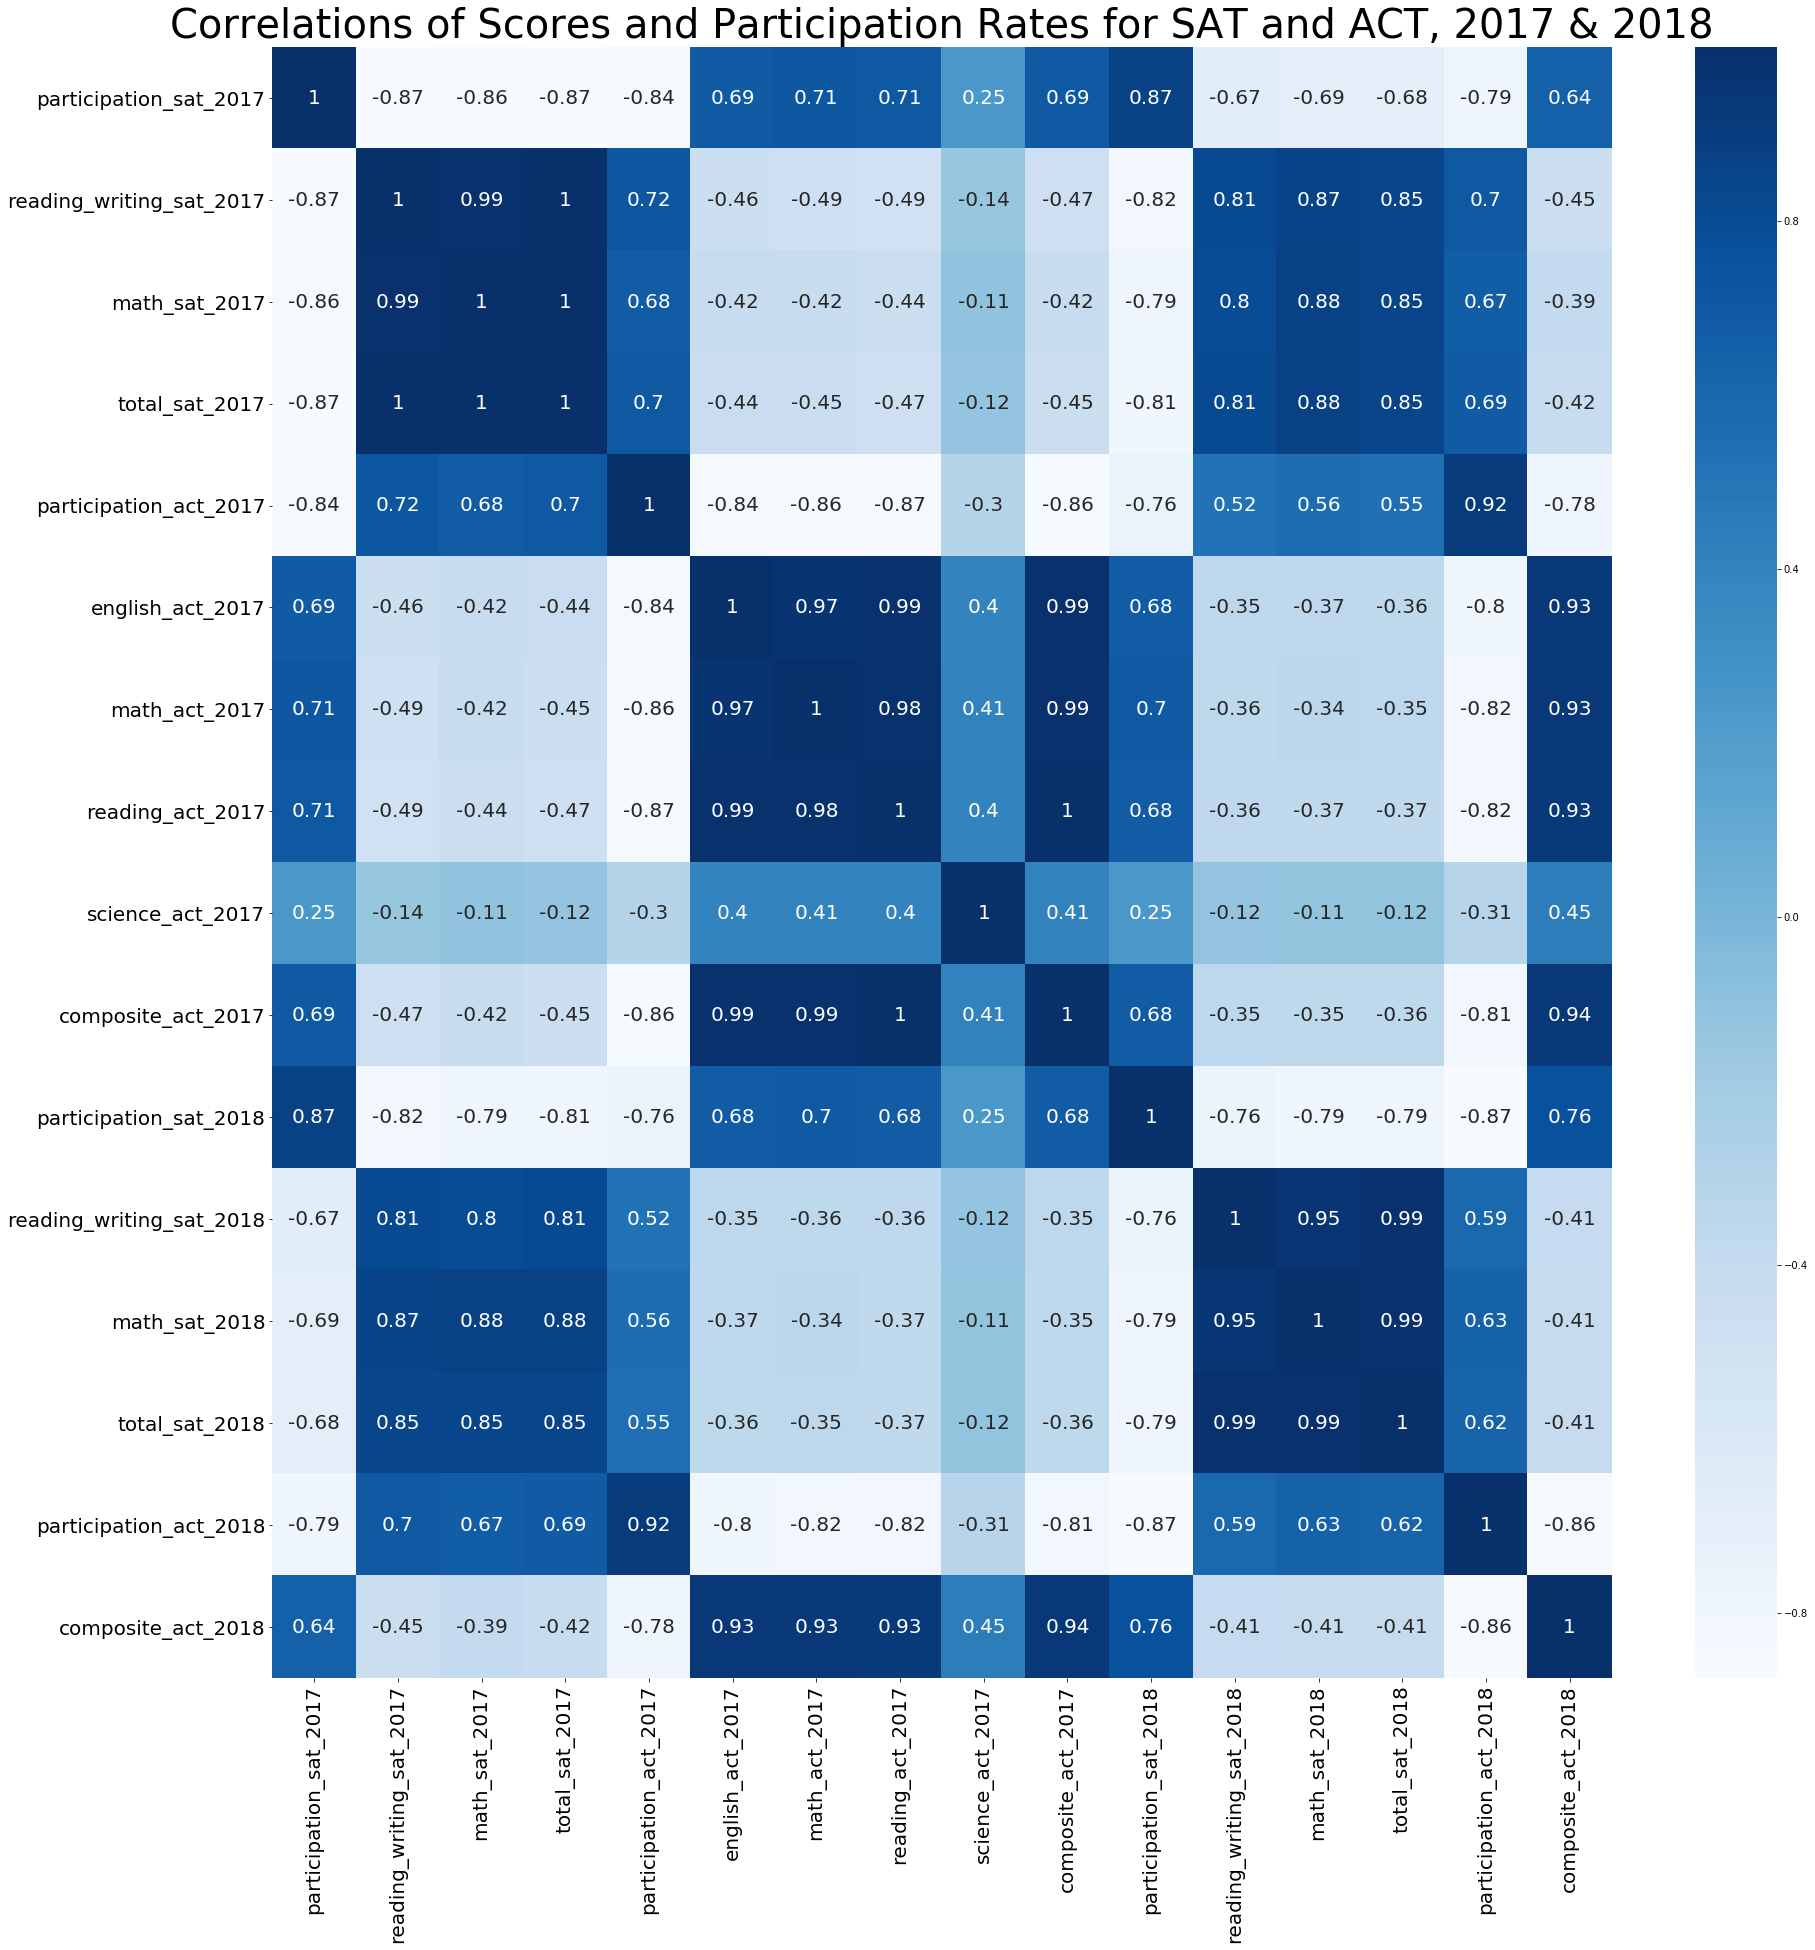

In [55]:
#plot a heatmap for the dataset of SAT and ACT stats for 2017 and 2018
fig = plt.figure(figsize=(30, 30))  #make the graph larger and proportioned for optimal visibility

#cmap='Blues' makes a nicer color pallette that is slightly easier to interpret
# annot=True puts the actual correlation values inside each square, 
# annot_kws={'size':20} sets values to readable size
ax = sns.heatmap(sat_act_17_18.corr(), annot=True, annot_kws={'size':20}, cmap='Blues') 
ax.set_title("Correlations of Scores and Participation Rates for SAT and ACT, 2017 & 2018", fontsize=40)
#make the values for x and y-axis larger and thus easier to read
ax.tick_params(axis='both', labelsize=20); 
#column at the end to clean up the top of our output

#### Define a custom function to subplot histograms

There is data for two tests for two years. There are only composite (and not subtest scores) for the 2018 ACT. I wrote a function that takes the names of 2+ columns and subplot histograms. Matplotlib gives you greater control over all aspects of your plots then pandas plotting or Seaborn.


In [56]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # 4 subplots will work well as 2 subplots in 2 rows, or 2 with 1 each
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(30,15)) # set figsize = (30,30), delete extra end parenthese
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=25) #set titles for each subplot, set fontsize=25
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=20) #set xlabels for each subplot, set fontsize smaller then title
        ax[i].tick_params(axis='both', labelsize=15); #set size of both x-ticks ansd y-ticks to something larger
        # Set titles, labels, etc here for each subplot

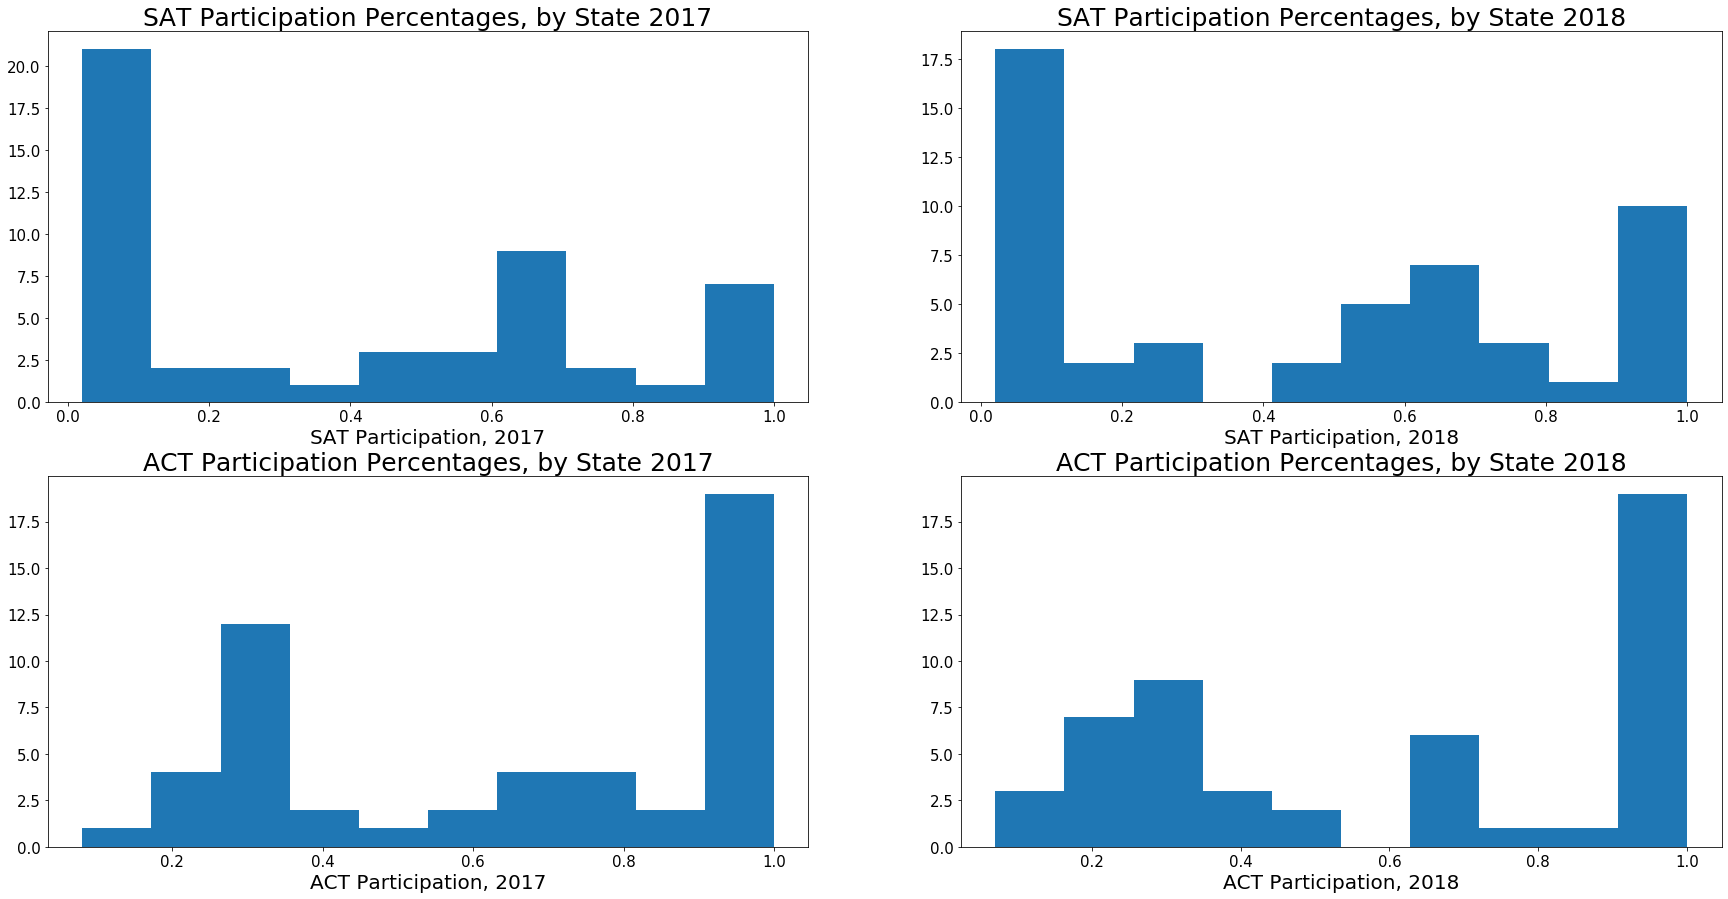

In [57]:
# Plot histogram of participation rates for the SAT & ACT 2017 & 2018

#assign a list of the columns of partipation rates of both tests for both years to call in the subplot function
#this list will be of the parameters to be called by the dataframe (sat_act_17_18)
list_col = ['participation_sat_2017', 'participation_sat_2018', 'participation_act_2017', 'participation_act_2018']



#assign an appropriate list to coordinate to the column list that will be a title for each subplot
list_titles = ['SAT Participation Percentages, by State 2017', 'SAT Participation Percentages, by State 2018', 
               'ACT Participation Percentages, by State 2017', 'ACT Participation Percentages, by State 2018']


#assign an appropriate list to coordinate to the column list that will be an xlabel for each subplot
list_xlabels = ['SAT Participation, 2017', 'SAT Participation, 2018', 'ACT Participation, 2017', 'ACT Participation, 2018']

#call the subplot function for our dataframe and the column list, list of titles, and list of xlabels defined above
subplot_histograms(sat_act_17_18, list_col, list_titles, list_xlabels)


**Interpretation:**  For the SATs, both years the graphs were left-skewed, showing that many more states had close to 0% participation then not, while for the ACTs, both years the graphs were right-skewed, showing that many more states had close to 100% participation than not.

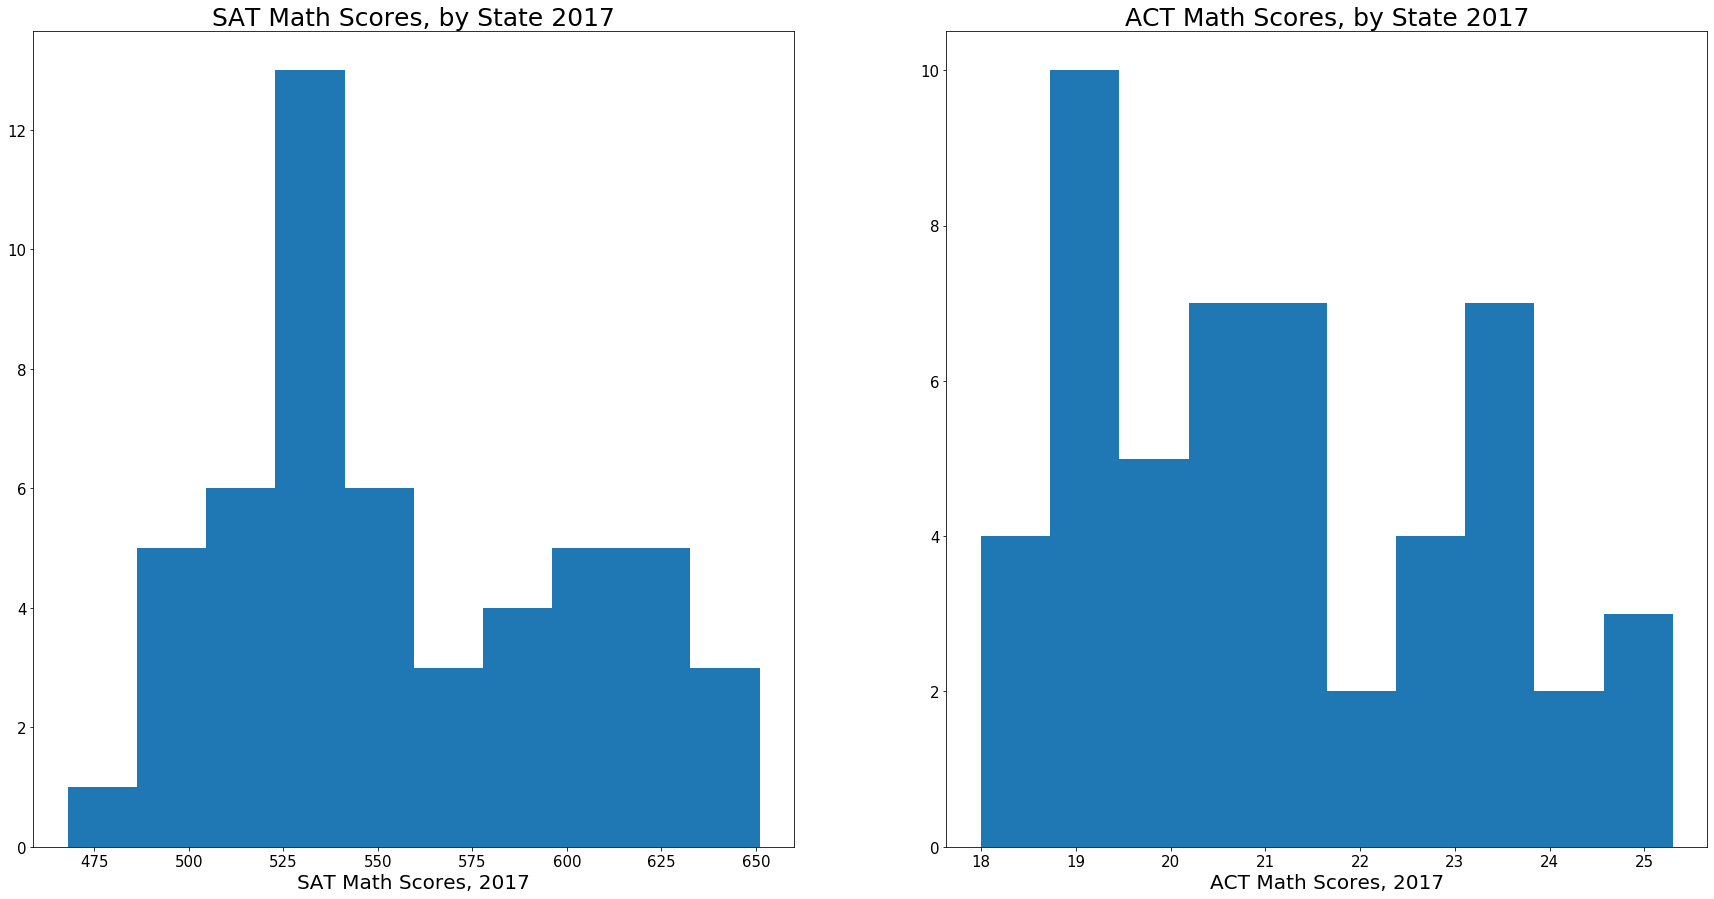

In [58]:
# Plot histogram of Math scores for the SAT & ACT 2017

#assign a list of the columns of Math scores of both tests for 2017 to call in the subplot function
# this list will be of the parameters to be called by our dataframe (sat_act_17_18)
list_col = ['math_sat_2017', 'math_act_2017']



# assign an appropriate list to coordinate to the column list that will be a title for each subplot
list_titles = ['SAT Math Scores, by State 2017',  'ACT Math Scores, by State 2017']


# assign an appropriate list to coordinate to the column list that will be an xlabel for each subplot
list_xlabels = ['SAT Math Scores, 2017', 'ACT Math Scores, 2017']

# call the subplot function for our dataframe and the column list, list of titles, and list of xlabels defined above
subplot_histograms(sat_act_17_18, list_col, list_titles, list_xlabels)


**Interpretation:**  There were very few states (only 1) with SAT Math scores less than 480, most were around 525 (about 13 states).  Most common ACT Math Scores (about 10 states) for 2017 were between a 19 and a 20. 

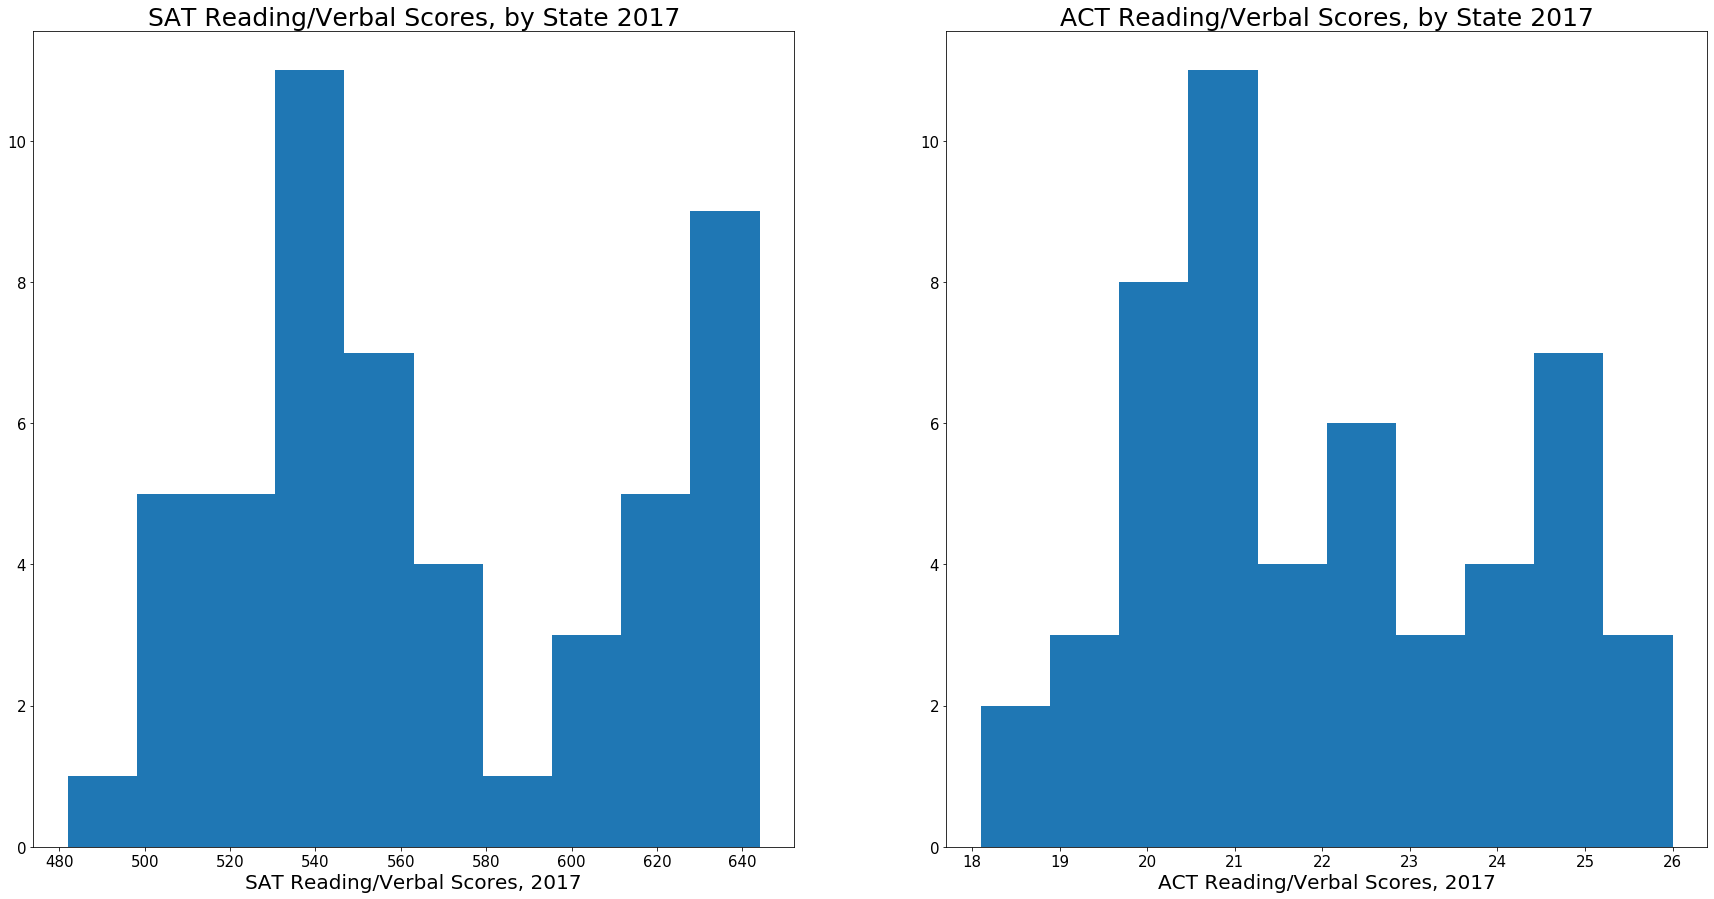

In [59]:
# Plot histogram of Reading/Verbal scores for the SAT & ACT 2017

# assign a list of the columns of Reading/Verbal scores of both tests for 2017 to call in the subplot function
# this list will be of the parameters to be called by the dataframe (sat_act_17_18)
list_col = ['reading_writing_sat_2017', 'reading_act_2017']



# assign an appropriate list to coordinate to the column list that will be a title for each subplot
list_titles = ['SAT Reading/Verbal Scores, by State 2017',  'ACT Reading/Verbal Scores, by State 2017']


# assign an appropriate list to coordinate to the column list that will be an xlabel for each subplot
list_xlabels = ['SAT Reading/Verbal Scores, 2017', 'ACT Reading/Verbal Scores, 2017']

# call the subplot function for the dataframe and the column list, list of titles, and list of xlabels defined above
subplot_histograms(sat_act_17_18, list_col, list_titles, list_xlabels)


**Interpretation:**  There were very few states with SAT reading/verbal scores less than 500 (one state), or between 580 and 600 (also one state only).  States definitely performed better on the reading/verbal SATs then the Math.  The highest frequency of a score range was for states that had a score close to 540, which was about 11 states.

#### Plot and interpret scatter plots

In [60]:
# function for making a specific scatterplot
def new_scatter(dataframe, list_of_columns, title, xlabel, ylabel):
    
    #set a decent size for the plots
    fig, ax = plt.subplots(figsize=(30,15))

    #create a scatter plot of the first value in list of columns vs the 2nd value in the list colums.  use blue
    ax.scatter(dataframe[list_of_columns[0]], dataframe[list_of_columns[1]], c= 'blue')
    ax.set_title(title, fontsize=35) #set titles for each subplot, set fontsize=25
    ax.set_xlabel(xlabel, fontsize=25) #set xlabels for each subplot, set fontsize smaller then title
    ax.set_ylabel(ylabel, fontsize=25) #set ylabels for each subplot, set fontsize smaller then title
    ax.tick_params(axis='both', labelsize=20);  #set size of both x-ticks ansd y-ticks to something larger

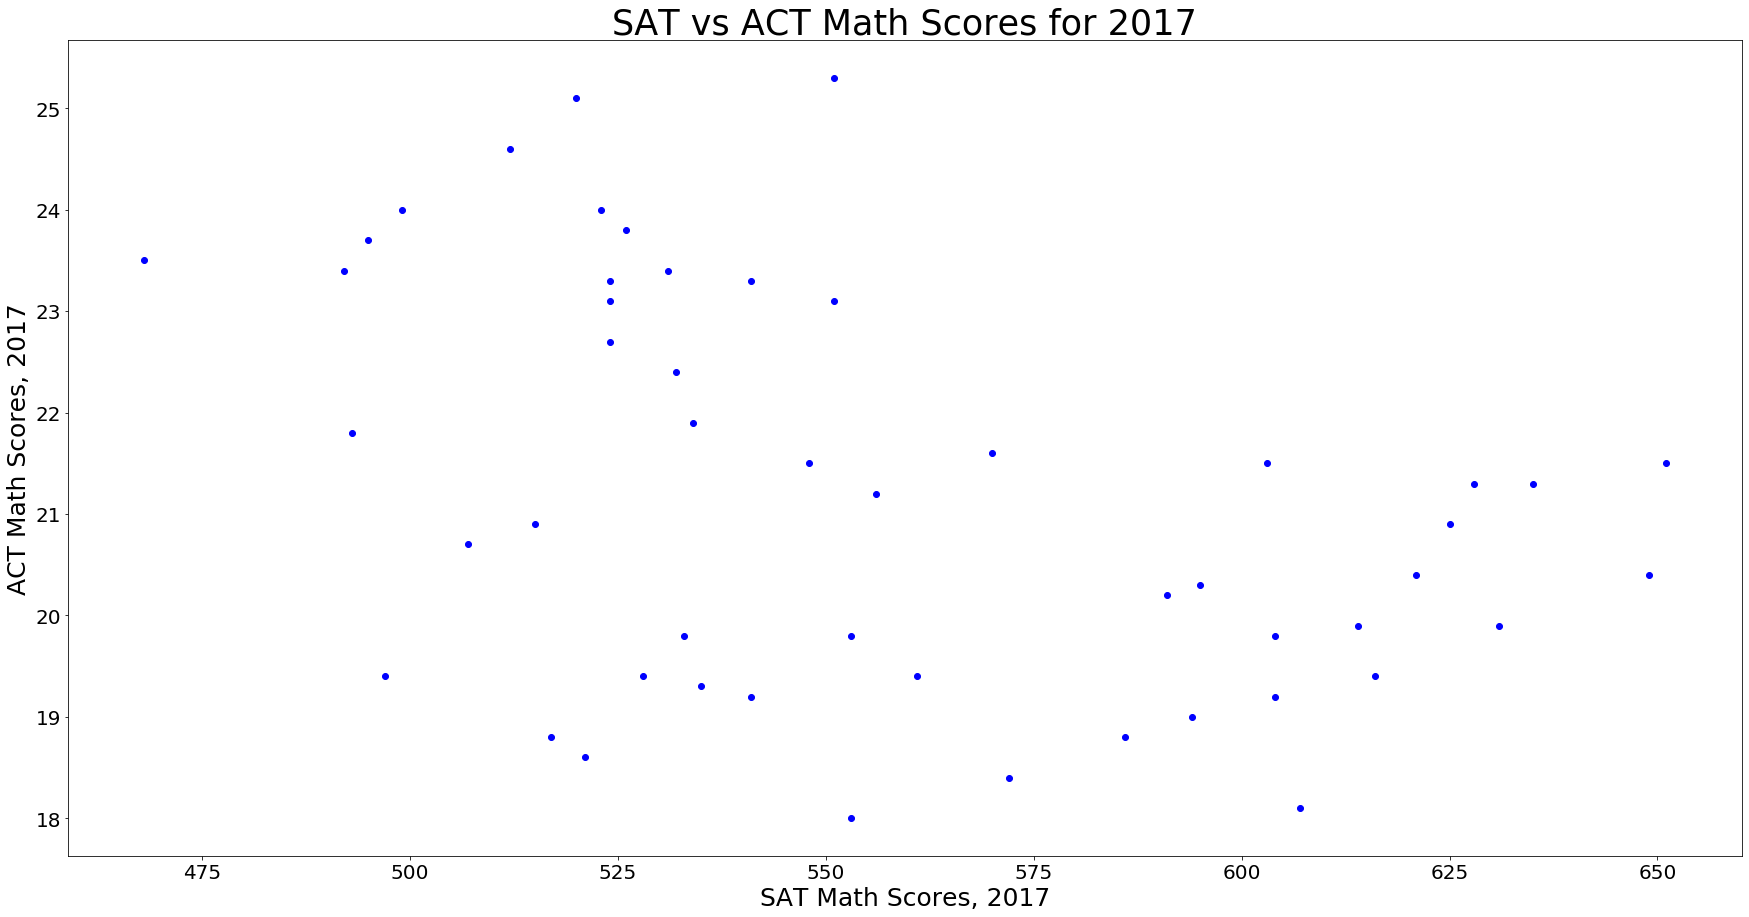

In [61]:
# Plot scatterplot of Math scores for the SAT & ACT 2017

#assign a list of the columns of Math scores of both tests for 2017 to call in the subplot function
#this list will be of the parameters to be called by our dataframe (sat_act_17_18)
list_col = ['math_sat_2017', 'math_act_2017']


#assign an appropriate list to coordinate to the column list that will be a title for each subplot
title = 'SAT vs ACT Math Scores for 2017'


#assign an appropriate list to coordinate to the column list that will be an xlabel for each subplot
xlabel = 'SAT Math Scores, 2017'

#assign an appropriate list to coordinate to the column list that will be an ylabel for each subplot
ylabel = 'ACT Math Scores, 2017'

#call our new scatter function for our dataframe and the column list, title, xlabels, and ylabel defined above
new_scatter(sat_act_17_18, list_col, title, xlabel, ylabel)

**Interpretation:**  I see very little corellation between the SAT 2017 Math scores and the ACT 2017 Math scores.  Perhaps a weakly negative relationship, curving positive around the 600 SAT scores.  So as SAT scores go up, ACT scores get lower (until SAT scores reach 600, and then ACT scores start going up.

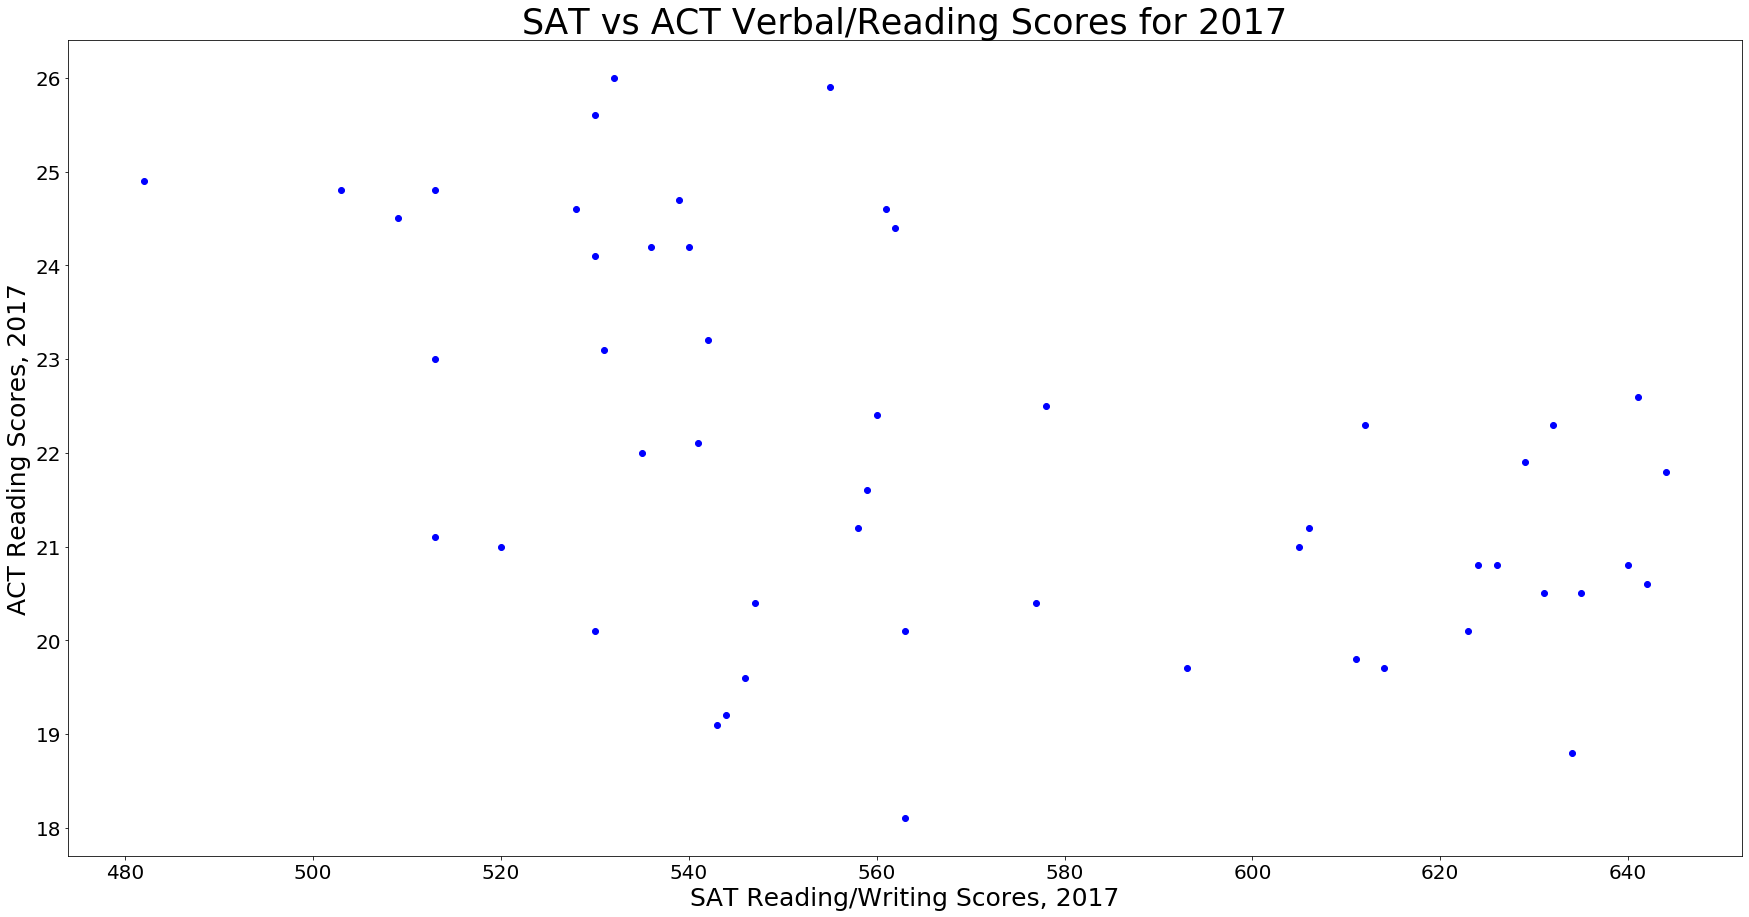

In [62]:
# Plot scatterplot of verbal/reading scores for the SAT & ACT 2017

#assign a list of the columns of verbal/reading scores of both tests for 2017 to call in the subplot function
#this list will be of the parameters to be called by our dataframe (sat_act_17_18)
list_col = ['reading_writing_sat_2017', 'reading_act_2017']


#assign an appropriate list to coordinate to the column list that will be a title for each subplot
title = 'SAT vs ACT Verbal/Reading Scores for 2017'


#assign an appropriate list to coordinate to the column list that will be an xlabel for each subplot
xlabel = 'SAT Reading/Writing Scores, 2017'

#assign an appropriate list to coordinate to the column list that will be an ylabel for each subplot
ylabel = 'ACT Reading Scores, 2017'

#call our new scatter function for our dataframe and the column list, title, xlabels, and ylabel defined above
new_scatter(sat_act_17_18, list_col, title, xlabel, ylabel)

**interpretaion:**  Again, very weak mostly negative correlation between SAT and ACT 2017 Verbal/Reading scores i.e. as SAT scores go up, ACT scores get lower.

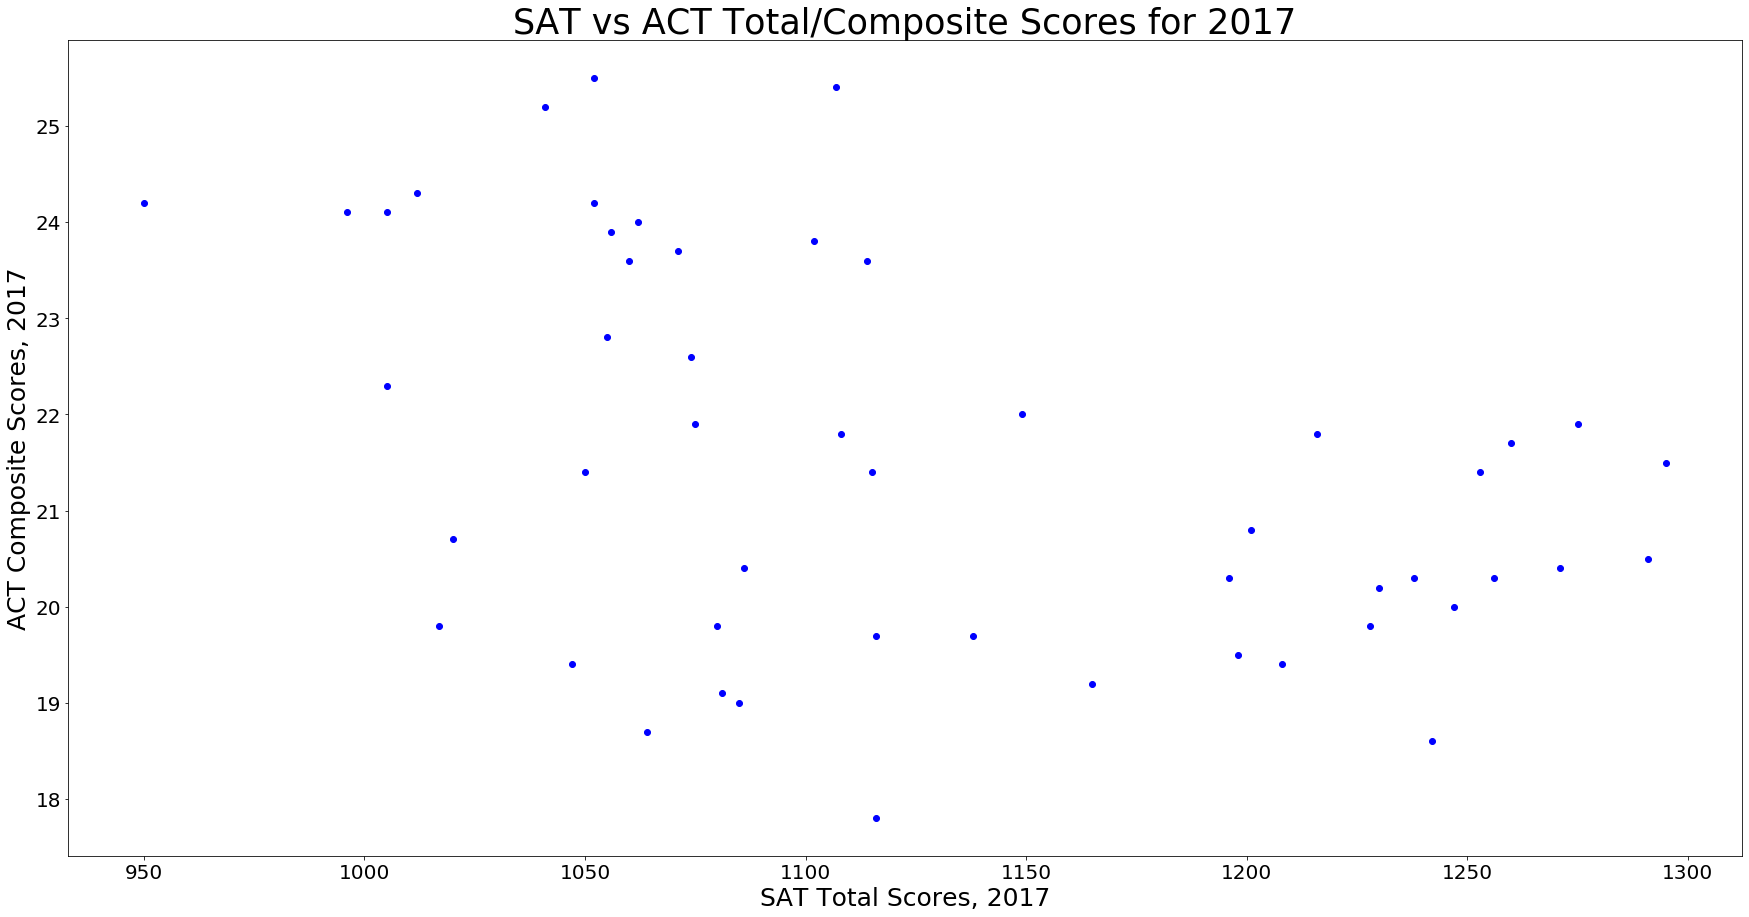

In [63]:
# Plot scatterplot of total/composite scores for the SAT & ACT 2017

#assign a list of the columns of total/composite scores of both tests for 2017 to call in the subplot function
#this list will be of the parameters to be called by our dataframe (sat_act_17_18)
list_col = ['total_sat_2017', 'composite_act_2017']


#assign an appropriate list to coordinate to the column list that will be a title for each subplot
title = 'SAT vs ACT Total/Composite Scores for 2017'


#assign an appropriate list to coordinate to the column list that will be an xlabel for each subplot
xlabel = 'SAT Total Scores, 2017'

#assign an appropriate list to coordinate to the column list that will be an ylabel for each subplot
ylabel = 'ACT Composite Scores, 2017'

#call our new scatter function for our dataframe and the column list, title, xlabels, and ylabel defined above
new_scatter(sat_act_17_18, list_col, title, xlabel, ylabel)

**Interpretation:**  As expected, the total/composite data for SAT and ACT scores of 2017 continue to have a weak, negative correlation up until about 3/4th of the way through the SAT scores, at which point the correlation turns to a weak, slightly positive relationship.

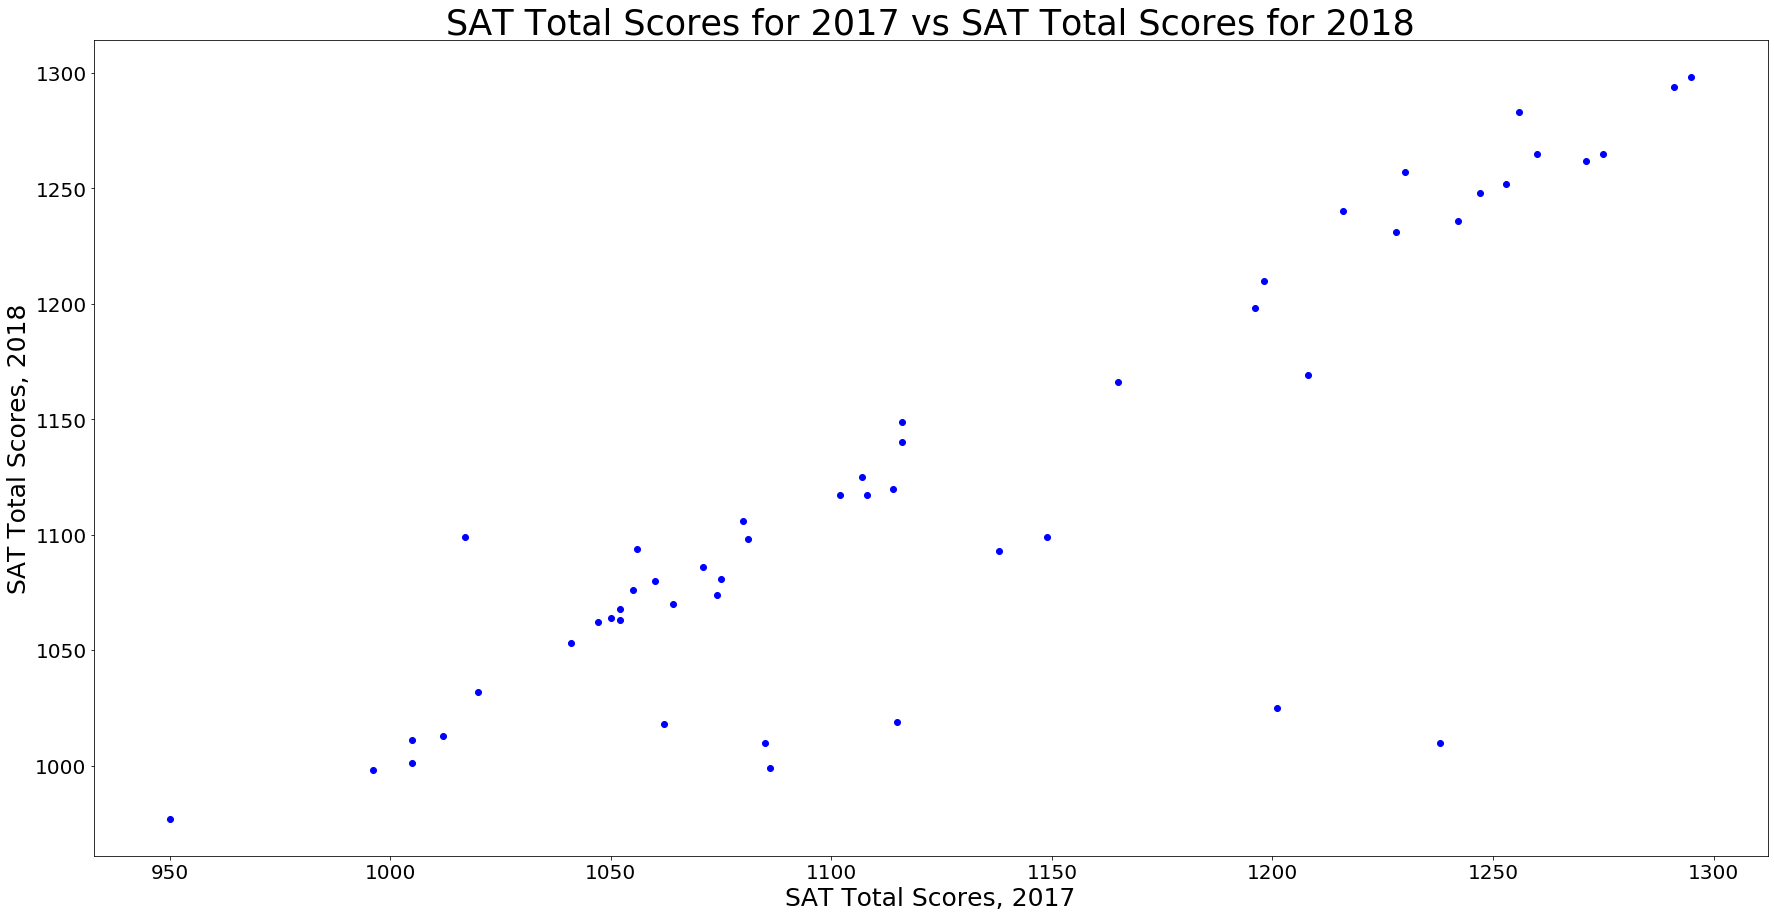

In [64]:
# Plot scatterplot of total scores for the SAT in 2017 vs 2018

#assign a list of the columns of total SAT scores for both years to call in the subplot function
#this list will be of the parameters to be called by our dataframe (sat_act_17_18)
list_col = ['total_sat_2017', 'total_sat_2018']


#assign an appropriate list to coordinate to the column list that will be a title for each subplot
title = 'SAT Total Scores for 2017 vs SAT Total Scores for 2018'


#assign an appropriate list to coordinate to the column list that will be an xlabel for each subplot
xlabel = 'SAT Total Scores, 2017'

#assign an appropriate list to coordinate to the column list that will be an ylabel for each subplot
ylabel = 'SAT Total Scores, 2018'

#call our new scatter function for our dataframe and the column list, title, xlabels, and ylabel defined above
new_scatter(sat_act_17_18, list_col, title, xlabel, ylabel)

**Interpretation:**  As I expected, there is a much stronger (and positive) correlation between the SAT total scores in 2017 and 2018. With the exception of a few expected outliers, the slope of the graph increases at a near 1-to-1 ratio.

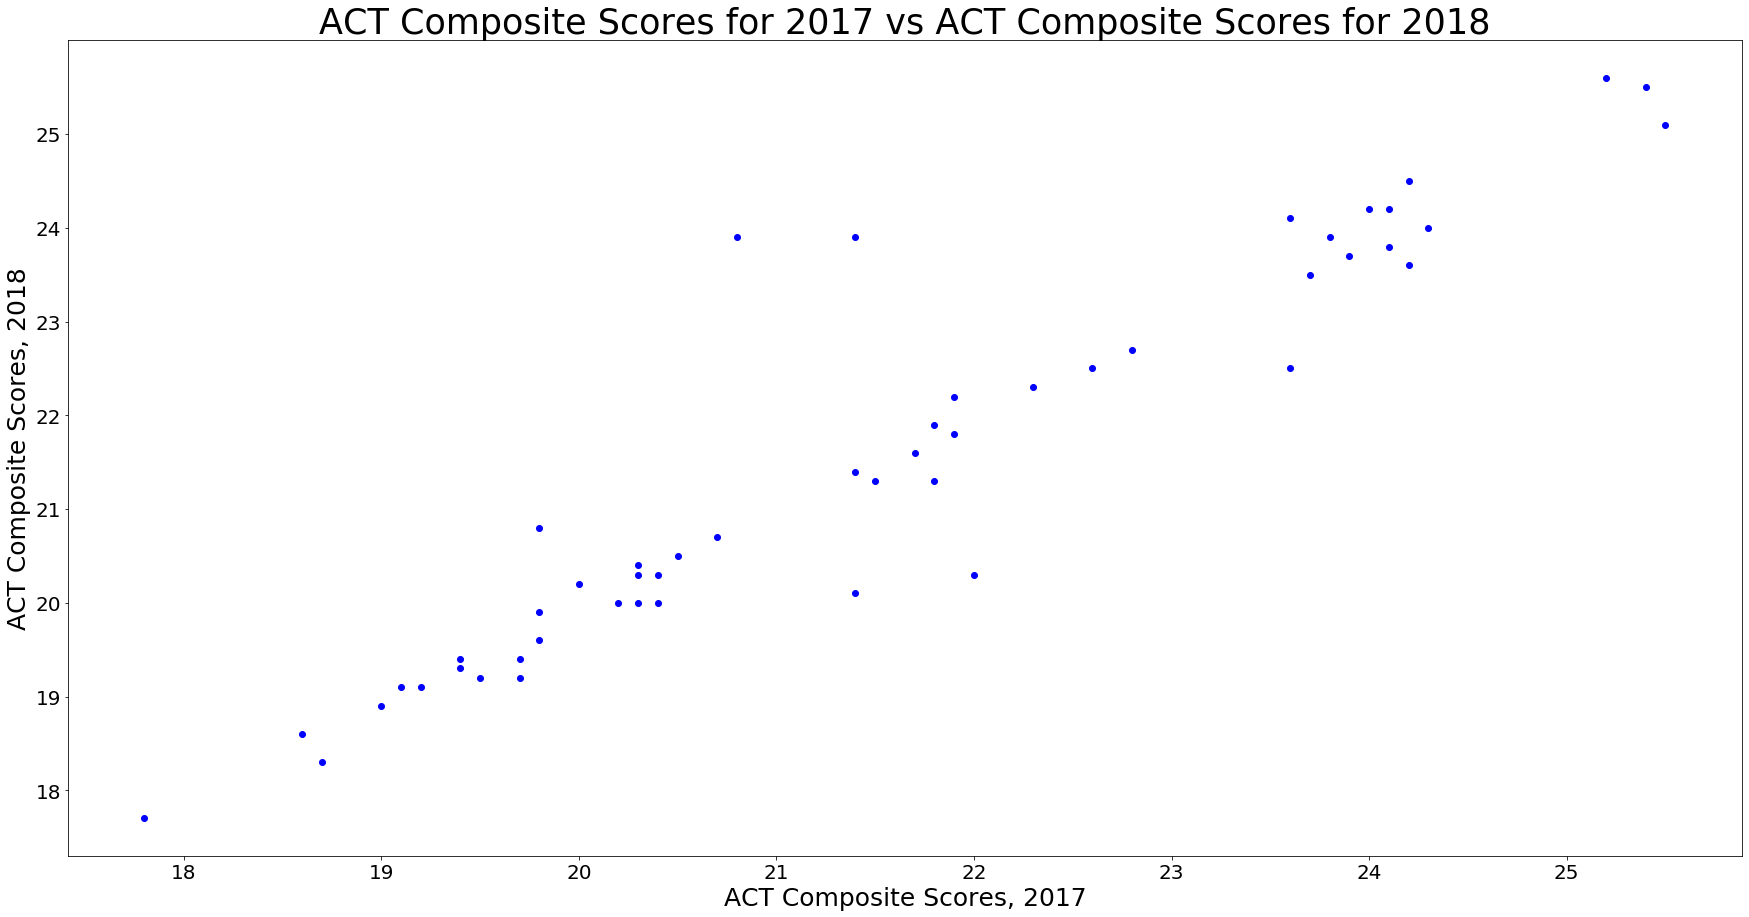

In [65]:
# Plot scatterplot of composite scores for the ACT in 2017 vs 2018

#assign a list of the columns of composite ACT scores for both years to call in the subplot function
#this list will be of the parameters to be called by our dataframe (sat_act_17_18)
list_col = ['composite_act_2017', 'composite_act_2018']


#assign an appropriate list to coordinate to the column list that will be a title for each subplot
title = 'ACT Composite Scores for 2017 vs ACT Composite Scores for 2018'


#assign an appropriate list to coordinate to the column list that will be an xlabel for each subplot
xlabel = 'ACT Composite Scores, 2017'

#assign an appropriate list to coordinate to the column list that will be an ylabel for each subplot
ylabel = 'ACT Composite Scores, 2018'

#call our new scatter function for our dataframe and the column list, title, xlabels, and ylabel defined above
new_scatter(sat_act_17_18, list_col, title, xlabel, ylabel)

**Interpretation:**  Again, as I had expected with the 2017 and 2018 SAT total scores, there is a very strong (and positive) correlation between the ACT composite scores in 2017 and 2018. With the exception of a few expected outliers, the slope of the graph increases at a near 1-to-1 ratio.  The correlation was even stronger for the ACT Composite comparison plot then it was for the SAT Total comparison plot

#### Plot and interpret boxplots

Boxplots demonstrate central tendency and spread in variables. This will better help identify clear outliers or differences in IQR, etc.

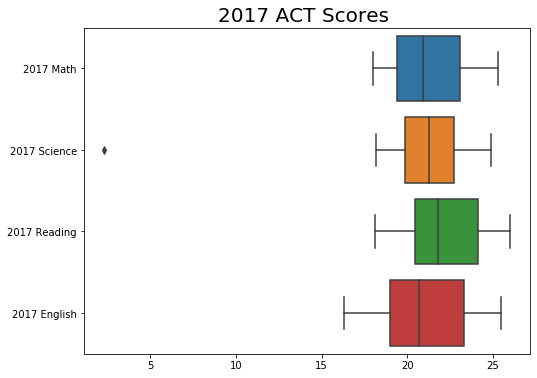

In [66]:
# an alteration of code provided by Bruno Santos
plt.figure(figsize = (8, 6))  # set graph to a big enough size
plt.title('2017 ACT Scores ', fontsize = 20)  #give it a properly named, appropriately sized title
sns.boxplot(data = (sat_act_17_18['math_act_2017'],      # boxplot 1 shows this data
                    sat_act_17_18['science_act_2017'],   # boxplot 2 shows this data
                    sat_act_17_18['reading_act_2017'],   # boxplot 3 shows this data
                    sat_act_17_18['english_act_2017']),  # boxplot 4 shows this data
            orient = 'h').set_yticklabels(['2017 Math',  # y tick labels showing which boxplot is which
                                           '2017 Science', 
                                           '2017 Reading', 
                                           '2017 English']);

**Interpretation:**  2017 Science ACT had one outlier, where one state got a score close to zero.  Each score had medians close to 20, with the 2017 reading score having a median near 22.5.  2017 English had a minimum close to 15, where every other score's minimum was closer to 17.5.  These scores otherwise are fairly similar to one another.  All of these are skewed to the right, except for science, which is fairly normally distributed.

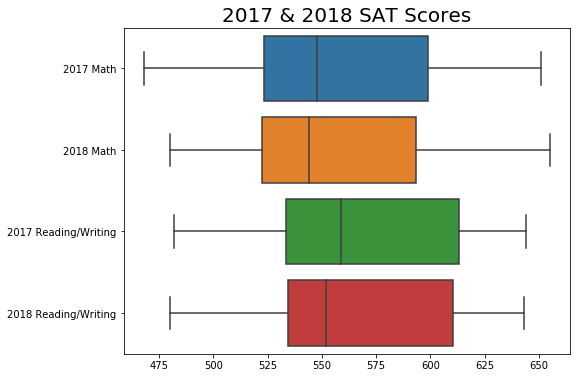

In [67]:
# an alteration of code provided by Bruno Santos
plt.figure(figsize = (8, 6))   # set graph to a big enough size
plt.title('2017 & 2018 SAT Scores', fontsize = 20)  #give it a properly named, appropriately sized title
sns.boxplot(data = (sat_act_17_18['math_sat_2017'],              # boxplot 1 shows this data
                    sat_act_17_18['math_sat_2018'],              # boxplot 2 shows this data
                    sat_act_17_18['reading_writing_sat_2017'],   # boxplot 3 shows this data
                    sat_act_17_18['reading_writing_sat_2018']),  # boxplot 4 shows this data
            orient = 'h').set_yticklabels(['2017 Math', # y tick labels showing which boxplot is which
                                           '2018 Math',
                                           '2017 Reading/Writing', 
                                           '2018 Reading/Writing']);

**Interpretation:**  2017 Math score minimum was lower then the others (which were a little above 475), and 2018 Math Score maximum was a little higher then the others (which were a little under 650).  Both Math tests had 1st quartiles were both just under 525, 3rd quartiles around 587 and medians close to 536.  Meanwhile, both reading/writing 1st quartiles were around 536, both of their 3rd quartiles were around 636, and their medians were close to 550.  All of these skew right.

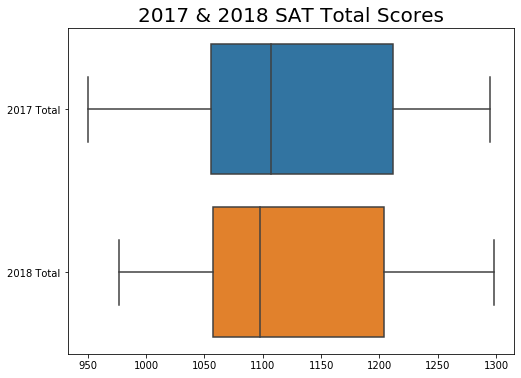

In [68]:
# an alteration of code provided by Bruno Santos
plt.figure(figsize = (8, 6))      # set graph to a big enough size
plt.title('2017 & 2018 SAT Total Scores', fontsize = 20)  #give it a properly named, appropriately sized title
sns.boxplot(data = (sat_act_17_18['total_sat_2017'],   # boxplot 1 shows this data
                    sat_act_17_18['total_sat_2018']),  # boxplot 2 shows this data
            orient = 'h').set_yticklabels(['2017 Total', # y tick labels showing which boxplot is which
                                           '2018 Total']); 

**Interpretation:**  The 2017 and 2018 SAT total scores were very very similar, although the 2017 had a minimum around 950, while the 2018 had a minimum around 975.  Both skew right.

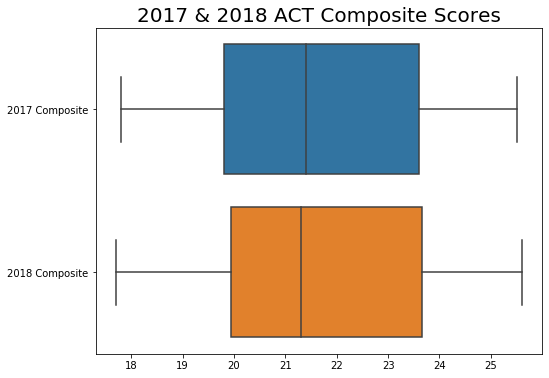

In [69]:
# an alteration of code provided by Bruno Santos
plt.figure(figsize = (8, 6))    # set graph to a big enough size
plt.title('2017 & 2018 ACT Composite Scores', fontsize = 20)   #give it a properly named, appropriately sized title
sns.boxplot(data = (sat_act_17_18['composite_act_2017'],    # boxplot 1 shows this data
                    sat_act_17_18['composite_act_2018']),   # boxplot 2 shows this data
            orient = 'h').set_yticklabels(['2017 Composite', # y tick labels showing which boxplot is which
                                           '2018 Composite']);

**Interpretation:**  The 2017 and 2018 ACT composite scores were even more similar, almost exactly the same.  Both skew right.

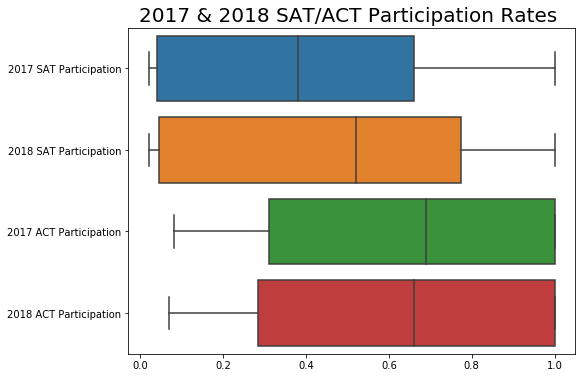

In [70]:
# an alteration of code provided by Bruno Santos
plt.figure(figsize = (8, 6))    # set graph to a big enough size
#give it a properly named, appropriately sized title
plt.title('2017 & 2018 SAT/ACT Participation Rates ', fontsize = 20)  
sns.boxplot(data = (sat_act_17_18['participation_sat_2017'],  # boxplot 1 shows this data
                    sat_act_17_18['participation_sat_2018'],  # boxplot 2 shows this data
                    sat_act_17_18['participation_act_2017'],  # boxplot 3 shows this data
                    sat_act_17_18['participation_act_2018']), # boxplot 4 shows this data
            orient = 'h').set_yticklabels(['2017 SAT Participation', # y tick labels showing which boxplot is which
                                           '2018 SAT Participation', 
                                           '2017 ACT Participation', 
                                           '2018 ACT Participation']);

**Interpretation:**  Both years the SAT participation rates were significantly lower then the ACT participation rates, although there was much less difference in minimum participation rates for all 4 tests.  There was a big jump in the SAT participation rate median from 2017 to 2018.  Both years the ACT 3rd quartile was almost the maximum participation rate.  All of these skew left.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

In [123]:
#recap
sat_act_17_18.describe()

,participation_sat_2017,reading_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,reading_writing_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608,0.457451,563.686275,556.235294,1120.019608,0.617255,21.496078
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695,0.373143,47.502627,47.772623,94.155083,0.340371,2.111583
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,17.700000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.950000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,21.300000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.650000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000


In [122]:
# Summarize the underlying distributions of the math SAT scores in 2017
print(sat_act_17_18['math_sat_2017'].describe()) #print statement of the stats given in the .describe() method
print(sat_act_17_18['math_sat_2017'].mode()) #print the result of the .mode() method, not specified in .describe()
sat_act_17_18[sat_act_17_18['math_sat_2017'] == 524] #shows how many times the mode occurs; here it is 3 times
#sns.distplot(sat_act_17_18['math_sat_2017'])

count     51.000000
mean     556.882353
std       47.121395
min      468.000000
25%      523.500000
50%      548.000000
75%      599.000000
max      651.000000
Name: math_sat_2017, dtype: float64
0    524
dtype: int64


,state,participation_sat_2017,reading_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,reading_writing_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7
20,Maryland,0.69,536,524,1060,0.28,23.3,23.1,24.2,2.3,23.6,0.76,545,535,1080,0.31,22.5
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,24.0,0.97,513,505,1018,0.15,24.2


For the 2017 math SAT's, the mean was 556.8823; in other words, the average math score of all the states in the US in 2017 was about 557.  The standard deviation was 47.121395; in other words, most scores were between 47.12 point below and 47.12 points above the mean score (i.e. most math SAT scores were between 510 and 604 in 2017).  Thus the variance (which can be caluclated by squaring the standard deviation) was 2,220.425867.  The minimum was 468; in other words, the lowest math SAT score among all 50 states (and DC) in 2017 was 468. The 1st quartile was 523.5; in other words, 25% of all 50 states got a math SAT score lower then 523.5 in 2017.  The 2nd quartile was 548; in other words, the median math SAT score (or the score that was directly in the middle (the 50% mark of our data) of the minimum and maximum score) was 548 in 2017.  Since the mean math score in 2017 (557) is greater then the median math score in 2017 (548), we know that the we have positive skewness (or the shape of the graph of the data skews right).  The 3rd quartile was 599; in other words, 25% of all 50 States got a Math SAT score higher than 599 in 2017 (note that this splits from the lowest 75% of scores, who scored less than 599).  Thus, the interquartile range (IQR, which is found by subtracting the first quartile from the 3rd quartile) was 75.5.  The maximum was 651; in other words, out of all 50 states (and DC), the highest SAT math score was 651.  The mode was 524; in other words, of all the math SAT scores from all 50 states in 2017, the score the occured the most often was 524, which occured 3 times.

In [120]:
# Summarize the underlying distributions of the reading/writing SAT scores in 2017
#print statement of the stats given in the .describe() method
print(sat_act_17_18['reading_writing_sat_2017'].describe()) 
#print the result of the .mode() method, not specified in .describe()
print(sat_act_17_18['reading_writing_sat_2017'].mode()) 
#shows how many times the mode occurs; here it is 3 times
sat_act_17_18[sat_act_17_18['reading_writing_sat_2017'] == 513]
#sat_act_17_18[sat_act_17_18['reading_writing_sat_2017'] == 530] #double check to make sure both occur the same amount


count     51.000000
mean     569.117647
std       45.666901
min      482.000000
25%      533.500000
50%      559.000000
75%      613.000000
max      644.000000
Name: reading_writing_sat_2017, dtype: float64
0    513
1    530
dtype: int64


,state,participation_sat_2017,reading_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,reading_writing_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3,1.00,508,493,1001,0.36,22.3
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0
43,Texas,0.62,513,507,1020,0.45,19.5,20.7,21.1,20.9,20.7,0.66,520,512,1032,0.45,20.7


For the 2017 reading/writing SAT's, the mean was 569.117647; in other words, the average reading/writing score of all the states in the US in 2017 was about 569.  The standard deviation was 45.666901; in other words, most scores were between 45.67 point below and 45.67 points above the mean score (i.e. most reading/writing SAT scores were between 523 and 615 in 2017).  Thus the variance (which can be caluclated by squaring the standard deviation) was 2,085.46584.  The minimum was 482; in other words, the lowest reading/writing SAT score among all 50 states (and DC) in 2017 was 482. The 1st quartile was 533.5; in other words, 25% of all 50 states got a reading/writing SAT score lower then 533.5 in 2017.  The 2nd quartile was 559; in other words, the median reading/writing SAT score (or the score that was directly in the middle (the 50% mark of our data) of the minimum and maximum score) was 559 in 2017.  Since the mean reading/writing score in 2017 (569) is greater then the median reading/writing score in 2017 (559), we know that the we have positive skewness (or the shape of the graph of the data skews right).  The 3rd quartile was 613; in other words, 25% of all 50 States got a reading/writing SAT score higher than 613 in 2017 (note that this splits from the lowest 75% of scores, who scored less than 613).  Thus, the interquartile range (IQR, which is found by subtracting the first quartile from the 3rd quartile) was 79.5.  The maximum was 644; in other words, out of all 50 states (and DC), the highest SAT reading/writing score was 644.  There were two modes, which were 513 and 530; in other words, of all the reading/writing SAT scores from all 50 states in 2017, the scores the occured the most often were 513 and 530, which both occured 3 times.

In [112]:
# Summarize the underlying distributions of the SAT total scores in 2017
print(sat_act_17_18['total_sat_2017'].describe()) #print statement of the stats given in the .describe() method
print(sat_act_17_18['total_sat_2017'].mode()) #print the result of the .mode() method, not specified in .describe()

#shows how many times the mode occurs; here it is 2 times
sat_act_17_18[sat_act_17_18['total_sat_2017'] == 1005]
sat_act_17_18[sat_act_17_18['total_sat_2017'] == 1052] #double check to make sure all occur the same amount
sat_act_17_18[sat_act_17_18['total_sat_2017'] == 1116] #double check to make sure all occur the same amount

count      51.000000
mean     1126.098039
std        92.494812
min       950.000000
25%      1055.500000
50%      1107.000000
75%      1212.000000
max      1295.000000
Name: total_sat_2017, dtype: float64
0    1005
1    1052
2    1116
dtype: int64


,state,participation_sat_2017,reading_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,reading_writing_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
28,Nevada,0.26,563,553,1116,1.00,16.3,18.0,18.1,18.2,17.8,0.23,574,566,1140,1.00,17.7


For the 2017 total SAT's, the mean was 1126.098039; in other words, the average total combined score of all the states in the US in 2017 was about 1,126.  The standard deviation was 92.494812; in other words, most scores were between 92.49 point below and 92.49 points above the mean score (i.e. most total SAT scores were between 1,033 and 1,218 in 2017).  Thus the variance (which can be caluclated by squaring the standard deviation) was 8,555.290247.  The minimum was 950; in other words, the lowest total SAT score among all 50 states (and DC) in 2017 was 950. The 1st quartile was 1,055.5; in other words, 25% of all 50 states got a total SAT score lower then 1,055.5 in 2017.  The 2nd quartile was 1,107; in other words, the median total SAT score (or the score that was directly in the middle (the 50% mark of our data) of the minimum and maximum score) was 1,107 in 2017.  Since the mean total score in 2017 (1,126) is greater then the median total score in 2017 (1,107), we know that the we have positive skewness (or the shape of the graph of the data skews right).  The 3rd quartile was 1212; in other words, 25% of all 50 States got a total SAT score higher than 1,212 in 2017 (note that this splits from the lowest 75% of scores, who scored less than 1,212).  Thus, the interquartile range (IQR, which is found by subtracting the first quartile from the 3rd quartile) was 156.5.  The maximum was 1,295; in other words, out of all 50 states (and DC), the highest SAT total combined score was 1,295.  There were three modes, which were 1005, 1052, and 1116; in other words, of all the total SAT scores from all 50 states in 2017, the scores the occured the most often were 1005, 1052, and 1116, which all occured 2 times.

From summarizing the distribution data that I did for the 2017 Math, Reading/writing, and Total SAT scores, the data was positively skewed (skewed right of normal distribution). The boxplots seem to confirm that all ACT and SAT scores skew right.  By looking at the histograms, it is clear to see that the for the 2017 and 2018 SAT participation data skews left of normal, while the 2017 and 2018 ACT participation data skews right of normal (it is interesting to note that based on the boxplots, both the SAT and the ACT 2017 and 2018 participation rates seem to skew left).  

#### Estimate Limits of Data

Unlike the scores, the participation rates are both measured by the same scale and aggregation (percentages as decimals).  They are both meant to represent the same populations (the United States, broken down into each of the 50 US states, plus DC, thus same granularity and aggregation), and both tests are taken during high school as a means to increase potential to get accepted to a college or university.  The ACT and SAT data are taken from two different sources, so it word be hard to determine if the sample population sizes for the surveys for either tests even remotely lined up state by state. 

We probably won't be able to infer quite as much about the sampled populations from our data due to outside influence; according to [magoosh](https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/), 14 states require ACT testing, while only 8 states require SAT testing (note: 3 states require both).  This, more than anything, probably accounts for why the average SAT participation rate in 2017 and 2018 is almost 2/3 the average ACT participation rate in the same years.  It would perhaps be worth comparing the  participation rates for the two tests in the 3 states where either one or the other is required, and even more so in the 26 states where neither test is required.  It is also worth noting that the same website ([magoosh](https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/)) also noted that some states that don't require a test will still pay for the testing, and conversely that some tests that require the test won't pay for the testing (which means that students from lower income families in those areas will not be able to take one or either test).  So I think that because of these outside influences that these data would not give conclusive evidence about the tests themselves, nor about the which tests the various states decide (as a percentage or average) to take or not take.

#### Statistical Evaluation of Distributions 

In [153]:
# Code:
sat_act_17_18[sat_act_17_18['state'] == 'Delaware']

,state,participation_sat_2017,reading_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,reading_writing_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
7,Delaware,1.0,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.0,505,492,998,0.17,23.8


In [151]:
sat_act_17_18[sat_act_17_18['state'] == 'Utah']#.describe()

,state,participation_sat_2017,reading_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,reading_writing_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
44,Utah,0.03,624,614,1238,1.0,19.5,19.9,20.8,20.6,20.3,0.04,480,530,1010,1.0,20.4


In [154]:
sat_act_17_18[sat_act_17_18['state'] == 'Tennessee']#.describe()

,state,participation_sat_2017,reading_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,reading_writing_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
42,Tennessee,0.05,623,604,1228,1.0,19.5,19.2,20.1,19.9,19.8,0.06,624,607,1231,1.0,19.6


## Outside Research

Based on my observations, I noticed an interesting trend among the SAT/ACT participation rates in three states: Delaware, Utah, and Tennessee.  The trend was that there was a negative correlation between SAT participation rates and ACT participation rates.  Delaware had a 100\% participation rate for the SAT in both 2017 and 2018 (the highest possible rate), but only a 18\% ACT participation rate in 2017 and an 18% ACT participation rate in 2018.  Meanwhile, Utah had a mere 3\% SAT participation rate in 2017 and a 4\% SAT participation rate in 2018, and yet a 100\% ACT participation rate both years.  Likewise, Tennessee had a 5\% SAT participation rate in 2017 and a 6\% SAT participation rate in 2018, and again like Utah a 100\% ACT participation rate both years.

According to [magoosh](https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/), in 2017 and 2018, Deleware required SAT testing but not ACT testing, and Utah required ACT but not SAT testing, which would explain a lot.  I was surprised, however, to see that in this same data from magoosh, in 2017 and 2018 Tennessee required both SAT *and* ACT testing.  The same source reported that, in 2017 and 2018, Delware would pay for a student to take the SAT's (but not the ACT's), Utah would pay for the ACT (but not the SAT), and Tennessee wouldn't pay for either testing.  According to [Vox](https://www.vox.com/the-goods/2019/3/28/18282453/sat-act-college-admission-testing-cost-price), in 2017 and 2018 the it cost \\$47.50 to take the SAT and \\$50.50 to take the ACT, so price wouldn't seem to be a huge factor.  But when taken into account that (according to [CNBC](https://www.cnbc.com/2018/12/07/median-household-income-in-every-us-state-from-the-census-bureau.html)) in 2018 the median household income for Utah was  \\$65,325 while the median household income for Tennesse was only \\$48,708.

## Conclusions and Recommendations

Probably the biggest takeaway from my exploration of the data is that there is a *negative* correlation between participation rates and scores for both the SATs and the ACTs:  in 2017, DC had the highest participation rate, yet in the same year it also had the lowest average SAT total score.  Similarly, in 2017, New Hampshire had one of the lowest ACT participation rates, and yet in the same year it also had the highest average ACT combined score.  This leads me to suspect that when a state requires its students to take a standardized test, a lot of those student are taking the test against their will and therefore not studying, whereas when the test is *not* required, the students that *are* taking the test are only doing so because they actually *want* to, and thus would be more inclined to study for the test and take it more seriously.

One state with a lower participation rate was North Dakota.  Of all the states, North Dakota had the lowest SAT participation rate in both 2017 and in 2018.  Rather than trying to get the North Dakota to mandate the taking of the test (which statistically brings up participation rates but NOT test scores), I would reccommend various other courses of action.  Based on [Hanover Research's 2014 report](https://www.hanoverresearch.com/media/Best-Practices-to-Increase-SAT-Participation-1.pdf), the best means to getting The College Board to increase participation amongst graduating seniors in North Dakota would be
- Covering all or part of exam fees
- Offering the SAT testing during school hours
- Providing a paid tutoring service to target high-scoring, low-income students